In [548]:
# data manipulation
import pandas as pd
import numpy as np

# dates
from datetime import date
from datetime import datetime
import calendar

# math & stats
from math import ceil

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# visualization
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

# others
import os

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_seq_items = 2000

**Introduction**
Finding new customers is vital in every industry. The process for finding new customers begins by
learning as much as possible from the existing customers. Understanding current customers allow
organizations to identify groups of customers that have different product interests, different market
participation, or different response to marketing efforts. With this, we will be able not only to serve
better our customers, but also to improve the targeting of prospective customers.
Market segmentation, the process of identifying customers’ groups, makes use of geographic, demographic, psychographic, and behavioral characteristics of customers. By understanding the differences between the different segments, organizations can make better strategic choices about
opportunities, product definition, positioning, promotions, pricing, and target marketing.

**Project Description**
XYZ Sports Company is a well-established fitness facility that has been serving the community for
several years. To enhance its marketing strategies, improve customer engagement, and tailor its services, the company aims to develop a comprehensive customer segmentation strategy. This project
will focus on dividing the customer base into distinct segments based on various characteristics and
behaviors.
This project will leverage the dataset provided by the company’s ERP system, which includes a
wealth of customer-related data, collected between June 1st 2014 and October 31st 2019. The
objective of the company is to create a data-driven strategy that will enable it to better understand
its customers, deliver more personalized services, and optimize marketing efforts.
To do this, we suggest you segment the customers using different perspectives and approaches, as
well as combine and analyze the results. XYZ would like to understand the value and demographics
of each customer segment, as well as gain insights into the different sports activities that customers
prefer to participate in.

**Expected outcomes**
1. Explore the data and identify the variables that should be used to segment customers.
2. Identify customer segments
3. Justify the number of clusters you chose (taking in consideration the business use as well).
4. Explain the clusters found.
5. Suggest business applications for the findings and define general marketing approaches for
each cluster.
Note: Invest time into evaluating your preprocessing pipeline, thinking how you want to do your
clustering, possible approaches, and advantages or disadvantages of different decisions.


| #   | Name                             | Description                                                                                                                                                                                                                               |
| --- | -------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 0   | ID                               | Unique identifier of the record                                                                                                                                                                                                           |
| 1   | Age                              | Age of the user at October 31st, 2019 if it is not a dropout, or age of the user at the date specified in the attribute EnrollmentFinish if it is a dropout                         |
| 2   | Gender                           | Gender of the user (Male or Female)                                                                                                                                                                                                       |
| 3   | Income                           | Monthly salary of user                                                                                                                                                                                                                   |
| 4   | EnrollmentStart                   | Date of first enrollment - This is the date when a customer or member initially enrolled or signed up for a service, program, or membership. It marks the beginning of their relationship with the company.                                                                                                                                                                                                                  |
| 5   | EnrollmentFinish                  | Finish date of last enrollment - This date represents the finish or end date of the customer's last enrollment period. It signifies when their latest contract or membership period ends.                                                                                                                                                                                                           |
| 6   | LastPeriodStart                   | Start date of the last activity or the last two months if less - This field typically captures the start date of the period covering the most recent contract or engagement with the company. If there has been no recent activity, it may represent the start date of the last two months.                                                                                                                                                                          |
| 7   | LastPeriodFinish                  | End date of last activity or last two months if less - This date corresponds to the end date covering the period of the last activity or subscription. It could be the date of the most recent visit to the gym, participation in a program, or the end of the last two months if there has been no recent activity.                                                                                                                                                                                     |
| 8   | DateLastVisit                     | Date and time of the user’s last visit to the sport facility                                                                                                                                                                              |
| 9   | DaysWithoutFrequency              | Number of days the user did not visit the facility before being considered a dropout                                                                                                                                                  |
| 10  | LifetimeValue                    | Total amount paid by the customer during the period in which he was enrolled (between EnrollmentStart and EnrollmentFinish)                                                                                                             |
| 11  | UseByTime                        | Indicates whether the user was enrolled in this form of use (True if he was, False otherwise) There is a form of valid use in the facilities, in which the user loads their account with a certain amount, and as they use it, the amount corresponding to the time spent in the facilities is discounted. Users who have had this type of use have the attribute UseByTime = True.                                                                                                                                          |
| 12  | AthleticsActivities               | Indicates if the user was ever enrolled in athletics activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)                                                                            |
| 13  | WaterActivities                   | Indicates if the user was ever enrolled in water activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)                                                                            |
| 14  | FitnessActivities                 | Indicates if the user was ever enrolled in fitness activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)                                                                          |
| 15  | DanceActivities                   | Indicates if the user was ever enrolled in dance activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)                                                                            |
| 16  | TeamActivities                    | Indicates if the user was ever enrolled in team activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)                                                                             |
| 17  | RacketActivities                  | Indicates if the user was ever enrolled in racket activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)               |
| 18  | CombatActivities                  | Indicates if the user was ever enrolled in combat sports activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)       |
| 19  | NatureActivities                  | Indicates if the user was ever enrolled in nature activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)               |
| 20  | SpecialActivities                 | Indicates if the user was enrolled in sports for disabled people during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)         |
| 21  | OtherActivities                   | Indicates if the user was ever enrolled in other activities that do not fall into the other categories during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise) |
| 22  | NumberOfFrequencies               | Number of visits to the sports facility since the date indicated in EnrollmentStart and the date indicated in EnrollmentFinish                                                                                                              |
| 23  | AttendedClasses                   | Number of classes the user attended between EnrollmentStart and EnrollmentFinish                                                                                                                                                           |
| 24  | AllowedWeeklyVisitsBySLA          | Indicates the number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish) - "Service Level Agreement" sets clear expectations for both the facility and the customer, ensuring that the customer understands the allowed number of visits, and any associated terms related to their contract. Typically it would outline the terms of usage, such as the allowable number of visits within a defined time frame. For example, the SLA might state that a customer is entitled to visit the facility up to five times per week.               |
| 25  | AllowedNumberOfVisitsBySLA        | Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)             |
| 26  | RealNumberOfVisits                | Indicates the actual number of visits that the user made to the facilities in the last period of his registration (between LastPeriodStart and LastPeriodFinish)                                                                          |
| 27  | NumberOfRenewals                  | Number of renewals during the registration period (between EnrollmentStart and EnrollmentFinish)                                                                                                                                         |
| 28  | HasReferences                     | This field contains the value True if NumberOfReferences > 0, or False otherwise                                                                                                                                                             |
| 29  | NumberOfReferences                 | Number of people with whom the user is related by family relationship or friendship                                                                                                                                                        |
| 30  | Dropout                          | Represents the user’s enrollment status, assuming the value True if he is quitting or False if he is not                                                                                                                                  |


Professor Farina input:

- **EnrollmentStart:** This is the date when a customer or member initially enrolled or signed up for a service, program, or membership. It marks the beginning of their relationship with the company.
- **EnrollmentFinish:** This date represents the finish or end date of the customer's last enrollment period. It signifies when their latest contract or membership period ends. 
- **LastPeriodStart:** This field typically captures the start date of the period covering the most recent contract or engagement with the company. If there has been no recent activity, it may represent the start date of the last two months.
- **LastPeriodFinish:** This date corresponds to the end date covering the period of the last activity or subscription. It could be the date of the most recent visit to the gym, participation in a program, or the end of the last two months if there has been no recent activity. 
- **UseByTime:** There is a form of valid use in the facilities, in which the user loads their account with a certain amount, and as they use it, the amount corresponding to the time spent in the facilities is discounted. Users who have had this type of use have the attribute UseByTime = True. Imagine if you have the Lisbon Metro card. You have the option of using the monthly pass. In the case of the project dataset, having the monthly pass is like having a contract that you sign up for monthly. If this is always the type of use that you have, then your UseByTime will be False. For the Metro card you can also choose the Zapping option, which allows you to load your account with some amount of money which gets reduced each time you use the Metro. In the case of the project dataset, they have this option as well, and if you use this form of access then your UseByTime will be set to True. Even if you go back to the monthly or subscription based access, your UseByTime will stay as True because you have used this at some point.

- **NumberOfFrequencies** vs **RealNumberOfVisits:** NumberOfFrequencies is measured between Enrollment dates; RealNumberOfVisits is measured between LastPeriod dates.

- An **SLA or a "Service Level Agreement"** sets clear expectations for both the facility and the customer, ensuring that the customer understands the allowed number of visits, and any associated terms related to their contract. Typically it would outline the terms of usage, such as the allowable number of visits within a defined time frame. For example, the SLA might state that a customer is entitled to visit the facility up to five times per week.

- **Regarding the usage of hierarchical clustering** methods in the group project
Since this work is focused on the analysis of customer segments (therefore making a strong use of centroids' values), you should avoid using hierarchical clustering methods for a single perspective since the shapes of the resulting clusters are unpredictable. Although, it is okay to use these methods to merge different clustering solutions (like we will do during the last practical session).

- **Regarding the use of categorical features in the clustering** methods taught in class
No, you shouldn't use categorical variables with the clustering methods we will see in class, as they are based on distances, which (1) are meaningless in categorical variables, and (2) polarize your clusters, assuming a disproportionate importance to clustering. However, if you want to use these variables, there are other methods that are prepared for categorical variables, which you can use as you please (part of the self-study evaluation criteria).
Regarding data scaling

- The data needs to be scaled, regardless of the evaluation or clustering method (unless you’re using basic approaches). This includes the data passed into the clustering procedure, since different scales lead to different relationships among data points and therefore each variable is going to have a different contribution to the calculation of these distance/performance metrics based on its scale and not necessarily its informativeness/importance.


- Dealing with date features: There are many options for working with dates, depending on what you want to do with the features. Below are some links that you may find helpful. This list is not exhaustive, but may help you get started:

https://numpy.org/doc/stable/reference/arrays.datetime.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
https://www.datacamp.com/cheat-sheet/working-with-dates-and-times-in-python-cheat-sheet

# Data Loading

In [549]:
# dataset import

df = pd.read_csv('XYZ_sports_dataset.csv', delimiter=';')
nrows, ncols = df.shape
print(f'Rows = {nrows} | Columns = {ncols}')

Rows = 14942 | Columns = 31


In [550]:
# have a glance at the dataset
df.head(10)

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
0,10000,60,Female,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,...,0.0,9.0,7,NaN,6.28,2,0,0.0,0,0
1,10001,29,Female,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,...,0.0,23.0,1,2.0,17.42,1,2,0.0,0,1
2,10002,23,Male,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,...,0.0,6.0,0,7.0,30.03,6,0,0.0,0,1
3,10003,9,Male,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,...,0.0,20.0,2,2.0,17.72,3,0,0.0,0,1
4,10004,35,Male,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,...,NaN,41.0,0,7.0,60.97,0,3,0.0,0,1
5,10005,24,Female,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,...,0.0,28.0,0,7.0,59.01,26,0,0.0,0,1
6,10006,23,Male,2340.0,2015-10-06,2019-04-11,2019-01-01,2019-06-30,2019-03-26,16,...,0.0,22.0,0,7.0,30.03,3,3,0.0,0,1
7,10007,23,Male,1910.0,2015-03-25,2019-07-31,2019-01-01,2019-06-30,2019-04-23,99,...,0.0,34.0,0,7.0,60.97,11,5,0.0,0,1
8,10008,29,Male,3220.0,2016-04-08,2017-06-07,2017-01-01,2017-06-30,2017-03-30,69,...,0.0,6.0,0,7.0,60.97,0,2,0.0,0,1
9,10009,14,Female,0.0,2016-07-07,2017-02-01,2016-07-01,2017-06-30,2016-11-19,74,...,0.0,6.0,6,2.0,17.72,0,2,0.0,0,1


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14942 entries, 0 to 14941
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          14942 non-null  int64  
 1   Age                         14942 non-null  int64  
 2   Gender                      14942 non-null  object 
 3   Income                      14447 non-null  float64
 4   EnrollmentStart             14942 non-null  object 
 5   EnrollmentFinish            14942 non-null  object 
 6   LastPeriodStart             14942 non-null  object 
 7   LastPeriodFinish            14942 non-null  object 
 8   DateLastVisit               14942 non-null  object 
 9   DaysWithoutFrequency        14942 non-null  int64  
 10  LifetimeValue               14942 non-null  float64
 11  UseByTime                   14942 non-null  int64  
 12  AthleticsActivities         14906 non-null  float64
 13  WaterActivities             149

In [552]:
df.isna().sum()

ID                              0
Age                             0
Gender                          0
Income                        495
EnrollmentStart                 0
EnrollmentFinish                0
LastPeriodStart                 0
LastPeriodFinish                0
DateLastVisit                   0
DaysWithoutFrequency            0
LifetimeValue                   0
UseByTime                       0
AthleticsActivities            36
WaterActivities                37
FitnessActivities              35
DanceActivities                36
TeamActivities                 35
RacketActivities               37
CombatActivities               33
NatureActivities               47
SpecialActivities              44
OtherActivities                35
NumberOfFrequencies            26
AttendedClasses                 0
AllowedWeeklyVisitsBySLA      535
AllowedNumberOfVisitsBySLA      0
RealNumberOfVisits              0
NumberOfRenewals                0
HasReferences                  12
NumberOfRefere

In [553]:
# report = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# report

## Initial Analysis

In [554]:
for col in df.columns:
    print(col + ':', len(df[col].unique()), '\n')

ID: 14942 

Age: 88 

Gender: 2 

Income: 738 

EnrollmentStart: 1490 

EnrollmentFinish: 1300 

LastPeriodStart: 12 

LastPeriodFinish: 11 

DateLastVisit: 1384 

DaysWithoutFrequency: 660 

LifetimeValue: 5668 

UseByTime: 2 

AthleticsActivities: 3 

WaterActivities: 3 

FitnessActivities: 3 

DanceActivities: 2 

TeamActivities: 3 

RacketActivities: 3 

CombatActivities: 3 

NatureActivities: 2 

SpecialActivities: 3 

OtherActivities: 3 

NumberOfFrequencies: 416 

AttendedClasses: 230 

AllowedWeeklyVisitsBySLA: 8 

AllowedNumberOfVisitsBySLA: 270 

RealNumberOfVisits: 60 

NumberOfRenewals: 7 

HasReferences: 3 

NumberOfReferences: 4 

Dropout: 2 



In [555]:
for col in df.columns:
    print(col + ':', df[col].unique(), '\n')

ID: [10000 10001 10002 ... 24939 24940 24941] 

Age: [60 29 23  9 35 24 14 20 63 12 28 26 47 39 19 30 43 44 13 17 22 21  2  1
 74 38 46 34  6 11 42 56 33 52 54 32  7 27  3 37 31 49 57 15  8 83  5 53
 40 41 45 18 64 51 25 69 55 48 16 10 72 62 36  4 78 50 67 66 59 86 81 73
 65  0 68 80 58 76 85 61 75 82 71 70 79 77 84 87] 

Gender: ['Female' 'Male'] 

Income: [ 5500.  2630.  1980.     0.  4320.  2220.  2340.  1910.  3220.  1800.
  2790.  4040.  2050.  2580.  4490.  3890.  1660.  2510.  3020.  2120.
  3340.  1710.  2520.  1290.  1970.  1230.  1520.  1820.  1670.  5210.
  1720.  1620.  3300.  2100.  1360.  1500.  2190.  3580.  1650.  4250.
  6540.  2020.  1440.  7210.  4910.  1680.  1730.  2960.  2130.  2490.
  5230.    nan  4790.  2320.  2500.  2590.  2530.  3180.  2110.  1490.
  4990.  1600.  5690.  3780.  1810.  3270.  1300.  1310.  5080.  1890.
  6490.  1450.  2540.  1590.  1690.  2730.  6080.  2250.  2800.  1610.
  4010.  3570.  2370.  2690.  5700.  2610.  5600.  1060.  1350.  1530.
 

- Transform and set **ID** variable as the index, since it is the unique identifier

In [556]:
df['ID'] = range(len(df))
df.set_index('ID', inplace=True)

- Check for duplicates

In [557]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    print(f'Dropping {duplicate_count} pair(s) of duplicates')
    df = df.drop_duplicates()
else:
    print(f'No duplicated values were found!')

Dropping 1 pair(s) of duplicates


- Variables of **EnrollmentStart**, **EnrollmentFinish**, **LastPeriodStart**, **LastPeriodFinish**and **DateLastVisit** have type object and are specificaly indicating dates

In [558]:
# Convert date columns to date format

date_cols = ['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit']

for date_col in date_cols:
    # Convert to datetime and handle null values (errors='coerce' turns invalid parsing into NaT)
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce', format='%Y-%m-%d')


- **DanceActivities** and **NatureActivities** have no enrollments and hence we choose to drop them.

Moreover, AthleticActivities(0.7%) and OtherActivities(0.2%) have a very small number of enrollments. For now we choose to keep activities with small percentages of enrollments for future use in feature engineering. (* Try summing the NumberOfActivities)

In [559]:
df.drop(columns=["DanceActivities","NatureActivities"], inplace=True)

# Create list of the remaining activities
Activities = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities','TeamActivities',
              'RacketActivities','CombatActivities','SpecialActivities','OtherActivities']

- **Gender**, all features of _**activities**_, **UseByTime** and **HasReferences** should be transformed to type boolean

In [560]:
# Gender
df['Gender'] = df['Gender'].apply(lambda x: 'True' if (x == 'Female') else 'False')

# activities
#for act in range(len(Activities)):
#    df[Activities[act]] = df[Activities[act]].apply(lambda x: 'True' if (x == 1.0) else ('False' if (x == 0.0) else x))

# UseByTime
#df['UseByTime'] = df['UseByTime'].apply(lambda x: 'True' if (x != 0.0) else 'False')

# HasReferences
df['HasReferences'] = df['HasReferences'].apply(lambda x: 'True' if (x == 1.0) else ('False' if x==0.0 else x))

# Coherence Checking

- 1. Age Consistency
- 2. Date Consistencies
- 3. Number of Visits Consistency
- 4. References Logic

**1. Age Consistency**
- Kids under 16 that have income.
- Babies enrolled in the gym
- Create new column 'CalculatedAge' to account for outdated ages as of 31st oct 2019
- Set to nan:
    - Age < Reference Date Year - EnrollmentStart Year
    - CalculatedAge < 16 & Income > 0

In [561]:
# Checking for missing values
df.Age.isna().sum()

0

In [562]:
# Create new column of 'CalculatedAge' to account outdated ages as of 31st oct 2019

# Set the reference date for age calculation
reference_date = datetime(2019, 10, 31)

# Function to calculate age based on your specified logic
def calculate_age(row):
    if row['Dropout'] == 1:
        if pd.to_datetime(row['EnrollmentFinish']) == reference_date:
            return row['Age']
        else:
            finish_date = pd.to_datetime(row['EnrollmentFinish'])
            year_difference = reference_date.year - finish_date.year
            return int(row['Age'] + year_difference)
    else:
        return row['Age']

# Apply the function to each row in the DataFrame
df['CalculatedAge'] = df.apply(calculate_age, axis=1)

# Optionally, find records where the calculated age is different from the age in the dataset
age_inconsistency = df[df['CalculatedAge'] != df['Age']]
age_inconsistency

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
1,29,True,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,...,23.0,1,2.0,17.42,1,2,False,0,1,33
2,23,False,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,...,6.0,0,7.0,30.03,6,0,False,0,1,25
4,35,False,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,...,41.0,0,7.0,60.97,0,3,False,0,1,36
5,24,True,2220.0,2015-12-01,2016-07-31,2016-01-01,2016-12-31,2016-07-28,3,140.00,...,28.0,0,7.0,59.01,26,0,False,0,1,27
8,29,False,3220.0,2016-04-08,2017-06-07,2017-01-01,2017-06-30,2017-03-30,69,212.60,...,6.0,0,7.0,60.97,0,2,False,0,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14934,21,False,2170.0,2018-04-04,2018-06-07,2018-01-01,2018-06-30,2018-04-04,64,50.40,...,1.0,0,7.0,60.97,0,0,False,0,1,22
14935,23,True,1440.0,2016-11-02,2018-01-07,2017-07-01,2018-06-30,2017-10-23,76,248.00,...,89.0,0,7.0,60.97,0,1,False,0,1,24
14936,21,True,1820.0,2016-11-11,2017-08-29,2017-01-01,2017-12-31,2017-06-14,76,124.50,...,12.0,0,7.0,60.97,1,2,False,0,1,23


In [563]:
# Kids under 16 years old that have income
# Note: legal working age is above 16 years in PT, so we will set observations with less than that to nan and impute age after 
kids_with_income = df[(df['CalculatedAge'] < 16) & (df['Income'] > 0)]
kids_with_income

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
1722,13,True,1260.0,2015-09-16,2017-08-29,2017-01-01,2017-12-31,2017-05-29,92,745.10,...,25.0,0,7.0,60.97,0,3,False,0,1,15
3013,11,False,1120.0,2017-01-10,2019-07-09,2019-01-01,2019-12-31,2019-06-17,22,854.91,...,70.0,84,2.0,17.42,3,3,False,0,1,11
3196,15,True,1240.0,2018-09-21,2019-07-09,2019-01-01,2019-12-31,2019-06-04,35,256.80,...,24.0,24,2.0,17.42,3,0,False,0,1,15
3889,5,True,3400.0,2019-04-04,2019-04-04,2019-07-01,2019-12-31,2019-09-18,43,180.20,...,12.0,10,2.0,17.42,2,1,False,0,0,5
4071,15,False,1870.0,2019-03-08,2019-05-20,2019-01-01,2019-06-30,2019-04-16,34,91.50,...,1.0,0,4.0,34.84,1,0,False,0,1,15
4128,14,True,2640.0,2015-02-03,2018-07-31,2018-01-01,2018-12-31,2017-05-17,440,1289.15,...,11.0,12,4.0,34.84,0,4,False,0,1,15
5279,9,False,3490.0,2014-08-01,2018-01-07,2017-07-01,2018-06-30,2017-11-24,44,1054.75,...,52.0,49,2.0,17.42,2,5,False,0,1,10
5302,15,False,1660.0,2015-09-25,2019-04-11,2019-01-01,2019-06-30,2019-03-12,30,577.60,...,24.0,24,2.0,16.86,3,3,False,0,1,15
7542,13,True,3870.0,2018-10-02,2018-10-02,2019-07-01,2019-12-31,2019-10-11,20,400.60,...,6.0,6,4.0,35.44,0,1,False,0,0,13


In [564]:
# Babies enrolled in gym
#  19 clients with age = 0
#  152 clients with age = 1
# Perhaps we can keep these as long as the rest is consitent.

# Many records have this age but EnrollmentStart is way before 2018

babies = df[(df['CalculatedAge'] <= 1 )]
babies

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
33,1,True,0.0,2019-04-26,2019-10-13,2019-07-01,2019-12-31,2019-07-27,78,186.20,...,7.0,5,2.0,17.42,0,1,False,0,1,1
198,1,True,0.0,2018-09-11,2018-09-11,2019-07-01,2019-12-31,2019-09-28,33,491.55,...,19.0,16,2.0,14.86,3,1,False,0,0,1
307,1,True,0.0,2019-04-03,2019-04-03,2019-07-01,2019-12-31,2019-10-26,5,303.20,...,17.0,10,2.0,17.42,6,1,False,0,0,1
649,1,False,0.0,2014-09-03,2014-09-03,2018-07-01,2018-12-31,2019-10-31,0,1968.47,...,180.0,191,2.0,4.86,2,5,False,0,0,1
673,1,True,0.0,2018-09-25,2018-09-25,2019-07-01,2019-12-31,2019-10-26,5,567.60,...,32.0,31,2.0,17.42,5,1,False,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14474,1,True,0.0,2019-10-14,2019-10-31,2019-07-01,2019-12-31,2019-10-26,5,69.20,...,1.0,1,NaN,4.86,2,0,False,0,0,1
14601,1,True,NaN,2019-03-08,2019-03-08,2019-07-01,2019-12-31,2019-10-26,5,263.55,...,10.0,6,2.0,14.86,1,1,False,0,0,1
14715,1,True,0.0,2019-07-15,2019-07-15,2019-07-01,2019-12-31,2019-09-14,47,451.40,...,1.0,0,2.0,17.14,1,1,False,0,0,1


In [565]:
# records where Age is smaller than the year difference from EnrollmentStart to Reference Date
reference_date = datetime(2019, 10, 31)
inconsistent_records = df[df['CalculatedAge'] < (reference_date.year - df['EnrollmentStart'].dt.year)]
inconsistent_records

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
649,1,False,0.0,2014-09-03,2014-09-03,2018-07-01,2018-12-31,2019-10-31,0,1968.47,...,180.0,191,2.0,4.86,2,5,False,0,0,1
7858,1,True,0.0,2014-08-04,2014-08-04,2019-07-01,2019-12-31,2019-10-19,12,1886.80,...,104.0,82,2.0,17.42,4,6,False,0,0,1
9751,1,True,0.0,2014-09-29,2014-09-29,2019-07-01,2019-12-31,2019-10-18,13,2054.60,...,85.0,80,2.0,17.42,2,5,True,1,0,1
13415,1,True,0.0,2014-10-07,2014-10-07,2019-07-01,2019-12-31,2019-10-18,13,2220.60,...,114.0,104,2.0,17.42,2,5,False,0,0,1


In [566]:
# Replace Income with nan if corresponding Age is <16
df.loc[(df['CalculatedAge'] < 16) & (df['Income'] > 0), 'Income'] = np.nan

**2. Date Consistencies**
- **Last Period Dates:** Instances found where 'LastPeriodStart' and 'LastPeriodFinish' are not within the 'EnrollmentStart' and 'EnrollmentFinish' period.
- **Date Last Visit:** Instances where 'DateLastVisit' is not within the 'EnrollmentStart' and 'EnrollmentFinish' period.

In [567]:
last_period_outside_enrollment = df[(df['LastPeriodStart'] <= df['EnrollmentStart']) | 
                                   (df['LastPeriodFinish'] >= df['EnrollmentFinish'])]
last_period_outside_enrollment

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
0,60,True,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,9.0,7,NaN,6.28,2,0,False,0,0,60
1,29,True,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,...,23.0,1,2.0,17.42,1,2,False,0,1,33
2,23,False,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,...,6.0,0,7.0,30.03,6,0,False,0,1,25
3,9,False,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,...,20.0,2,2.0,17.72,3,0,False,0,1,9
4,35,False,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,...,41.0,0,7.0,60.97,0,3,False,0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14937,14,False,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,1460.45,...,112.0,96,4.0,34.84,8,3,False,0,0,14
14938,39,False,NaN,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,343.85,...,57.0,0,7.0,60.97,3,0,False,0,1,42
14939,20,False,1810.0,2017-03-01,2017-03-31,2017-01-01,2017-06-30,2017-03-29,2,43.60,...,6.0,0,7.0,30.03,8,0,False,0,1,22


In [568]:
date_last_visit_issue = df[(df['DateLastVisit'] < df['EnrollmentFinish']) |
                             (df['DateLastVisit'] > df['LastPeriodFinish'])]
date_last_visit_issue

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
0,60,True,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,9.0,7,NaN,6.28,2,0,False,0,0,60
1,29,True,2630.0,2014-08-12,2015-09-14,2015-01-01,2015-12-31,2015-07-16,60,479.20,...,23.0,1,2.0,17.42,1,2,False,0,1,33
2,23,False,1980.0,2017-05-02,2017-06-01,2017-01-01,2017-06-30,2017-05-25,7,37.60,...,6.0,0,7.0,30.03,6,0,False,0,1,25
3,9,False,0.0,2018-09-05,2019-02-12,2018-07-01,2019-06-30,2019-01-21,22,155.40,...,20.0,2,2.0,17.72,3,0,False,0,1,9
4,35,False,4320.0,2016-04-20,2018-06-07,2018-01-01,2018-06-30,2017-11-09,210,373.20,...,41.0,0,7.0,60.97,0,3,False,0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,23,True,1440.0,2016-11-02,2018-01-07,2017-07-01,2018-06-30,2017-10-23,76,248.00,...,89.0,0,7.0,60.97,0,1,False,0,1,24
14936,21,True,1820.0,2016-11-11,2017-08-29,2017-01-01,2017-12-31,2017-06-14,76,124.50,...,12.0,0,7.0,60.97,1,2,False,0,1,23
14938,39,False,NaN,2015-09-17,2016-06-04,2016-01-01,2016-06-30,2016-04-27,38,343.85,...,57.0,0,7.0,60.97,3,0,False,0,1,42


In [569]:
# last period finish is 31st of october 2019  and  dropout is 1
dropout_on_last_day = df[(df['Dropout'] != 1) & (df['EnrollmentFinish'] == pd.Timestamp('2019-10-31'))]
dropout_on_last_day

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
0,60,True,5500.0,2019-09-03,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,89.35,...,9.0,7,NaN,6.28,2,0,False,0,0,60
19,28,False,2510.0,2019-10-01,2019-10-31,2019-07-01,2019-12-31,2019-10-21,10,52.00,...,2.0,0,NaN,24.01,2,0,False,0,0,28
34,74,True,5210.0,2019-10-01,2019-10-31,2019-07-01,2019-12-31,2019-10-11,20,38.50,...,4.0,0,NaN,30.03,4,0,False,0,0,74
107,19,True,1690.0,2019-10-02,2019-10-31,2019-07-01,2019-12-31,2019-10-15,16,48.00,...,2.0,0,NaN,28.98,2,0,False,0,0,19
109,29,True,2730.0,2019-09-13,2019-10-31,2019-07-01,2019-12-31,2019-10-29,2,96.20,...,13.0,0,NaN,48.02,13,0,False,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14820,23,True,2600.0,2019-09-05,2019-10-31,2019-07-01,2019-12-31,2019-10-09,22,63.20,...,6.0,0,NaN,30.03,7,0,False,0,0,23
14860,17,True,1650.0,2019-09-23,2019-10-31,2019-07-01,2019-12-31,2019-10-30,1,87.20,...,3.0,3,NaN,17.16,4,0,False,0,0,17
14863,39,False,1790.0,2019-10-09,2019-10-31,2019-07-01,2019-12-31,2019-10-24,7,65.20,...,6.0,0,NaN,21.98,8,0,False,0,0,39


**3. Visit Counts Consistency**
- Instances where the actual number of visits ('RealNumberOfVisits') exceeded the allowed number by the SLA ('AllowedNumberOfVisitsBySLA').
- **Action Needed:** Investigate for potential errors in visit tracking or SLA data.

In [570]:
real_visits_exceed_allowed = df[df['RealNumberOfVisits'] > df['AllowedNumberOfVisitsBySLA']]
real_visits_exceed_allowed

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
271,35,True,1000.0,2015-02-20,2015-02-20,2019-07-01,2019-12-31,2019-10-29,2,1235.85,...,196.0,191,2.0,6.86,10,5,False,0,0,35
354,48,True,4390.0,2016-09-12,2019-10-31,2017-01-01,2017-12-31,2019-10-31,0,441.30,...,214.0,0,7.0,30.03,34,3,False,0,1,48
409,20,True,1650.0,2016-09-20,2016-09-20,2019-07-01,2019-12-31,2019-10-31,0,711.40,...,191.0,126,3.0,19.29,49,3,False,0,0,20
481,54,True,2980.0,2018-11-12,2018-11-12,2019-07-01,2019-12-31,2019-10-29,2,337.85,...,59.0,59,2.0,17.42,26,1,False,0,0,54
672,60,True,5170.0,2015-05-05,2015-05-05,2019-07-01,2019-12-31,2019-10-31,0,1529.55,...,322.0,318,2.0,8.58,11,5,False,0,0,60
1034,32,False,2960.0,2019-10-09,2019-10-31,2019-07-01,2019-12-31,2019-10-31,0,90.20,...,6.0,5,NaN,6.28,8,0,False,0,0,32
1232,33,False,2470.0,2015-08-19,2015-08-19,2019-07-01,2019-12-31,2019-10-30,1,1421.70,...,263.0,253,2.0,17.42,24,5,False,0,0,33
1862,12,False,0.0,2016-07-19,2016-07-19,2019-07-01,2019-12-31,2019-10-26,5,1154.10,...,67.0,34,1.0,6.71,7,4,False,0,0,12
1890,24,True,2040.0,2015-07-06,2016-08-01,2016-01-01,2016-12-31,2016-07-20,12,205.00,...,20.0,20,1.0,8.71,10,2,False,0,1,27


In [571]:
# use by time is 1 but user never came to gym
usebytime_issue = df[(df['UseByTime'] == 1) & (df['RealNumberOfVisits'] == 0 )] 
# usebytime_issue

In [572]:
# is this questionable ??
# has NumberOfRenewals != 0 but dropout = 0 
df[(df['NumberOfRenewals'] != 0) & (df['Dropout'] == 0 )]

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,
25,13,True,0.0,2015-09-09,2015-09-09,2019-07-01,2019-12-31,2019-10-26,5,596.30,...,27.0,18,2.0,6.28,3,4,False,0,0,13
36,13,True,0.0,2014-10-02,2014-10-02,2019-07-01,2019-12-31,2019-10-22,9,2209.97,...,199.0,166,2.0,17.14,5,5,True,1,0,13
38,38,True,1910.0,2018-09-29,2018-09-29,2019-07-01,2019-12-31,2019-10-30,1,554.60,...,127.0,125,3.0,26.13,25,1,False,0,0,38
49,56,False,6540.0,2018-09-03,2018-09-03,2019-07-01,2019-12-31,2019-10-29,2,540.10,...,112.0,0,7.0,60.97,32,1,False,0,0,56
51,12,True,0.0,2018-08-17,2018-08-17,2019-07-01,2019-12-31,2019-10-28,3,852.30,...,42.0,42,4.0,34.84,4,2,False,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14918,73,False,3870.0,2014-12-10,2014-12-10,2019-07-01,2019-12-31,2019-10-31,0,1583.90,...,472.0,0,7.0,60.97,45,5,False,0,0,73
14919,1,True,0.0,2019-07-18,2019-07-18,2019-07-01,2019-12-31,2019-10-31,0,201.20,...,8.0,7,2.0,17.14,7,1,False,0,0,1
14926,24,True,3290.0,2018-10-08,2018-10-08,2019-01-01,2019-12-31,2019-10-29,2,196.10,...,36.0,37,2.0,17.42,7,1,False,0,0,24


We will get to this issue later and deal with it with feature engineering.

**4. Reference Logic**
- Inconsistencies between 'HasReferences' and 'NumberOfReferences': cases where 'HasReferences' is True but 'NumberOfReferences' is 0, or vice versa.
- **Action Needed:** Review and correct reference-related fields for consistency.

In [573]:
has_references_inconsistency = df[((df['HasReferences'] == 1) & (df['NumberOfReferences'] == 0)) | 
                                  ((df['HasReferences'] == 0) & (df['NumberOfReferences'] == 1))]
has_references_inconsistency

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,CalculatedAge
ID,,,,,,,,,,,,,,,,,,,,,


# Exploratory Analysis

In [574]:
binary_features = [
    'Gender', 'UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities', 
    'TeamActivities', 'RacketActivities', 'CombatActivities', 
    'SpecialActivities', 'OtherActivities', 'HasReferences', 'Dropout'
]

activity_columns = ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 
    'TeamActivities', 'RacketActivities', 'CombatActivities', 
    'SpecialActivities', 'OtherActivities'
]

metric_features = [
    'Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies', 
    'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 'AllowedNumberOfVisitsBySLA',
    'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences', 
]

date_features = [
    'EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart',
    'LastPeriodFinish', 'DateLastVisit'
]


# new dataframes
binary_df = df[binary_features].copy()
metric_df = df[metric_features].copy()
date_df = df[date_features].copy()

In [575]:
# check if we are not missing any feature
binary_df.shape[1] + metric_df.shape[1] + date_df.shape[1]

28

Text(0.5, 0.98, 'Histograms')

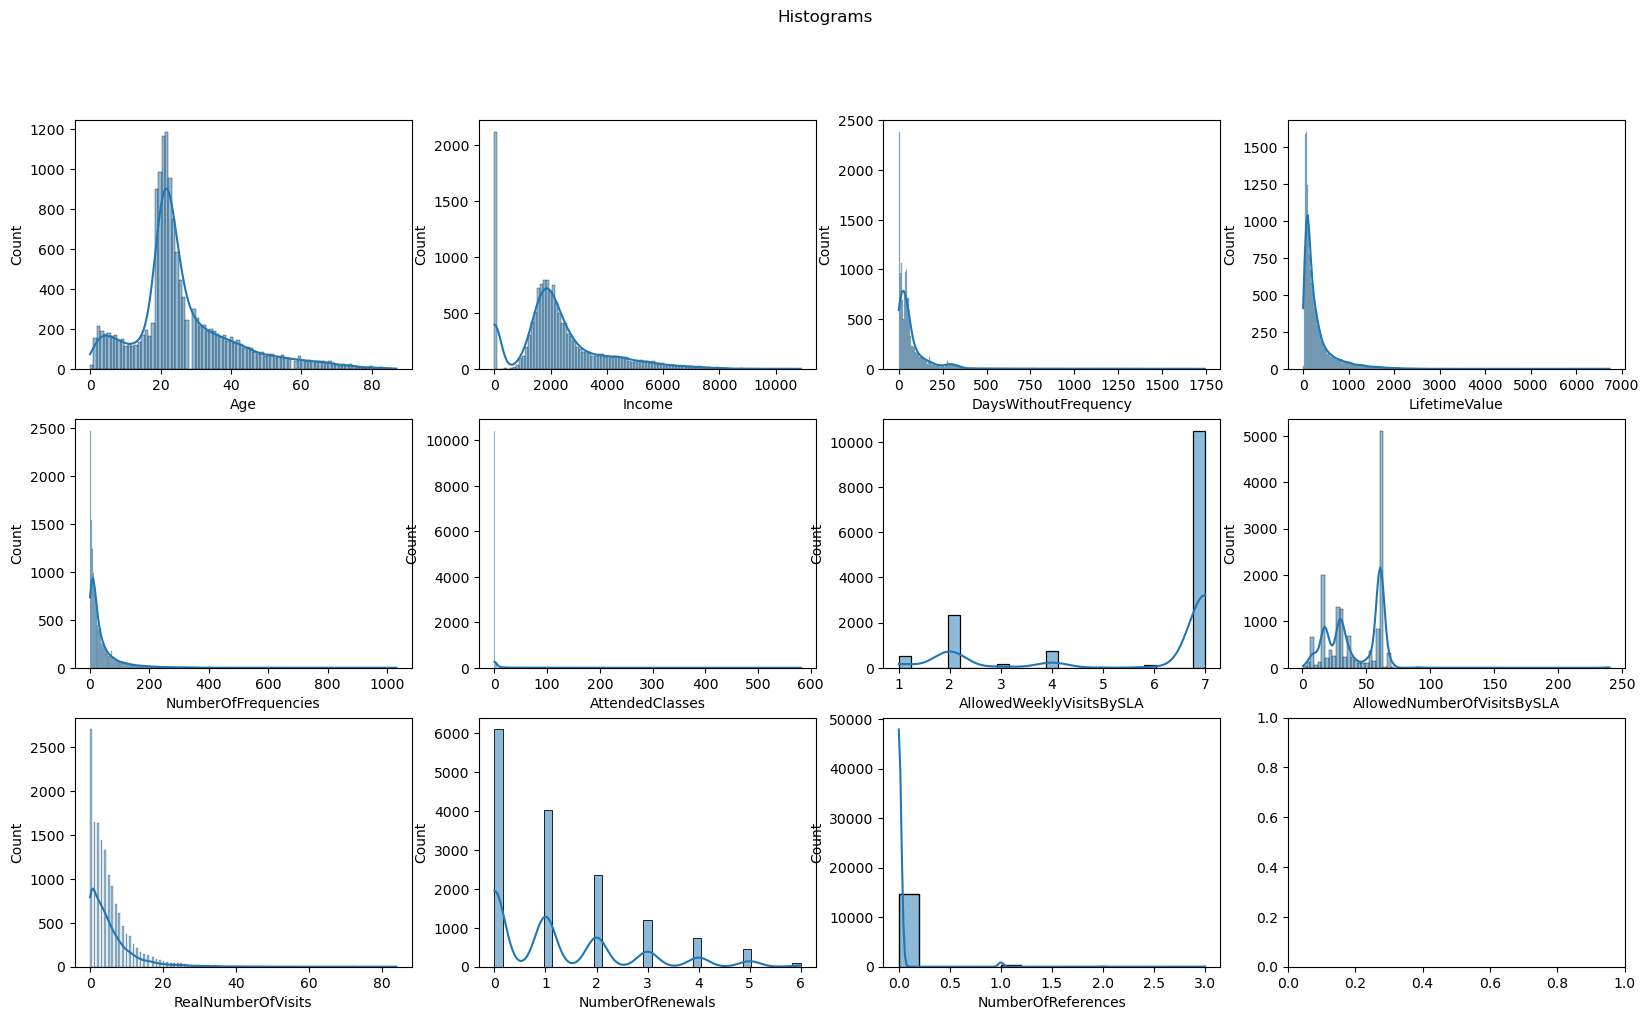

In [576]:
fig, axes = plt.subplots(3, ceil(len(metric_df.columns) / 3), figsize=(20,11))

for ax, feat in zip(axes.flatten(), metric_df.columns):
    # ax.hist(data_health[feat]) 
    sns.histplot(data = metric_df, x = metric_df[feat], kde = True, ax = ax)

plt.suptitle("Histograms")

Text(0.5, 0.98, 'Box Plots')

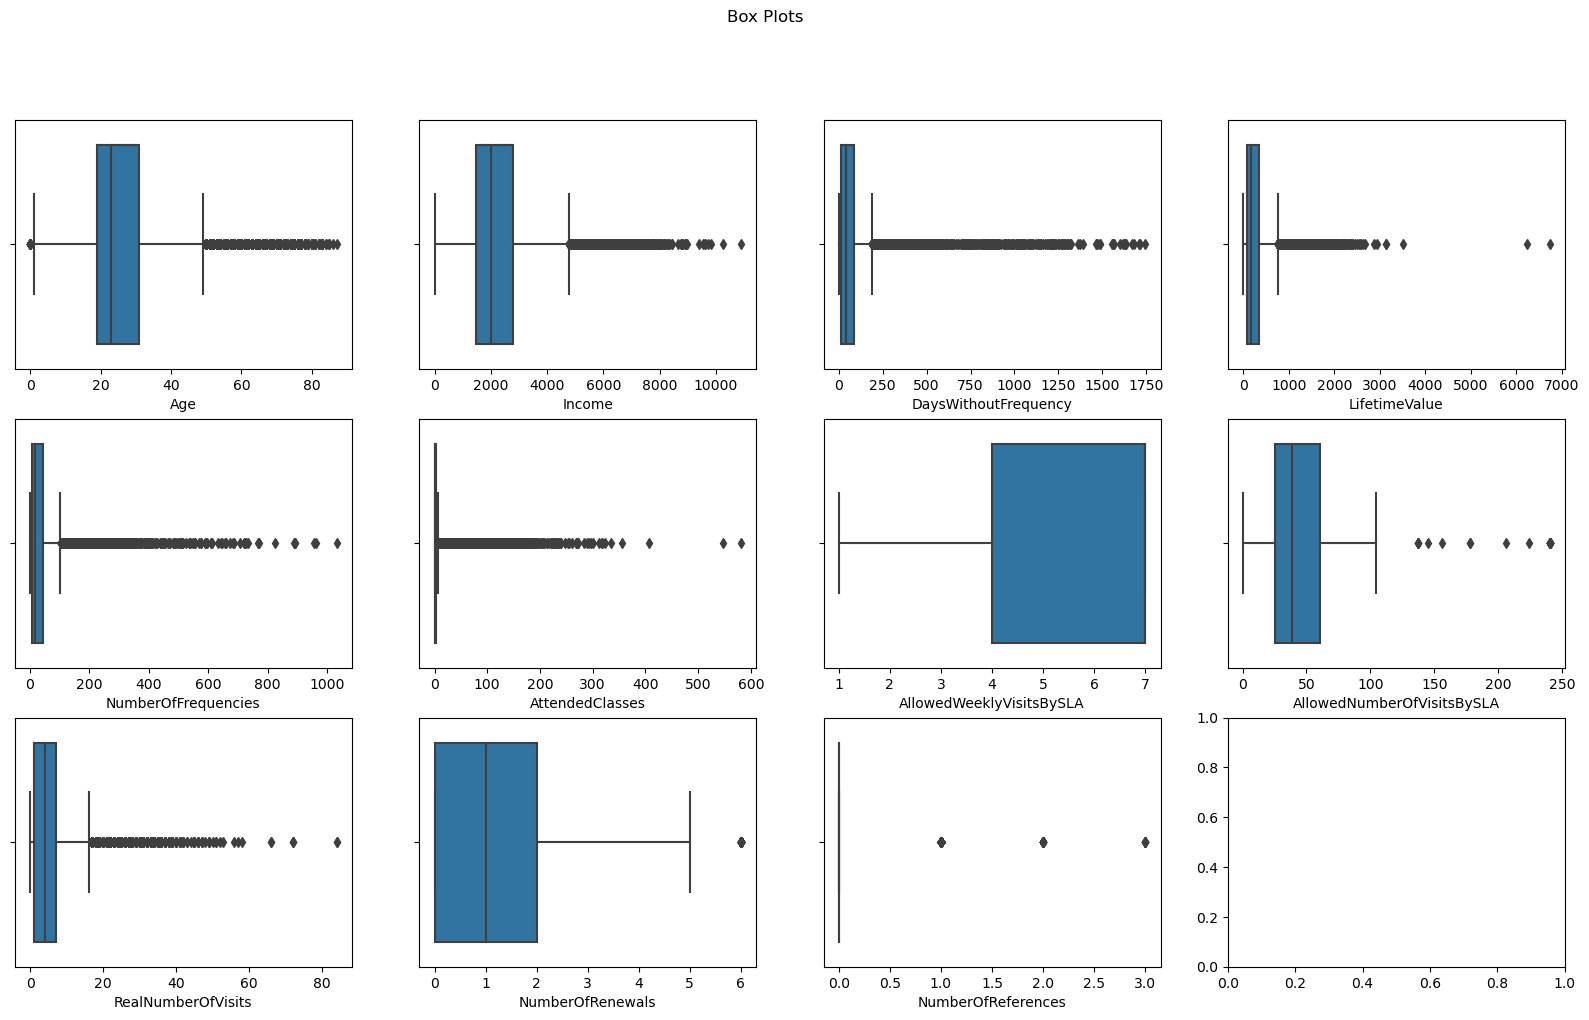

In [577]:
fig, axes = plt.subplots(3, ceil(len(metric_df.columns) / 3), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_df.columns):
    sns.boxplot(x=metric_df[feat], ax=ax)
    
plt.suptitle("Box Plots")

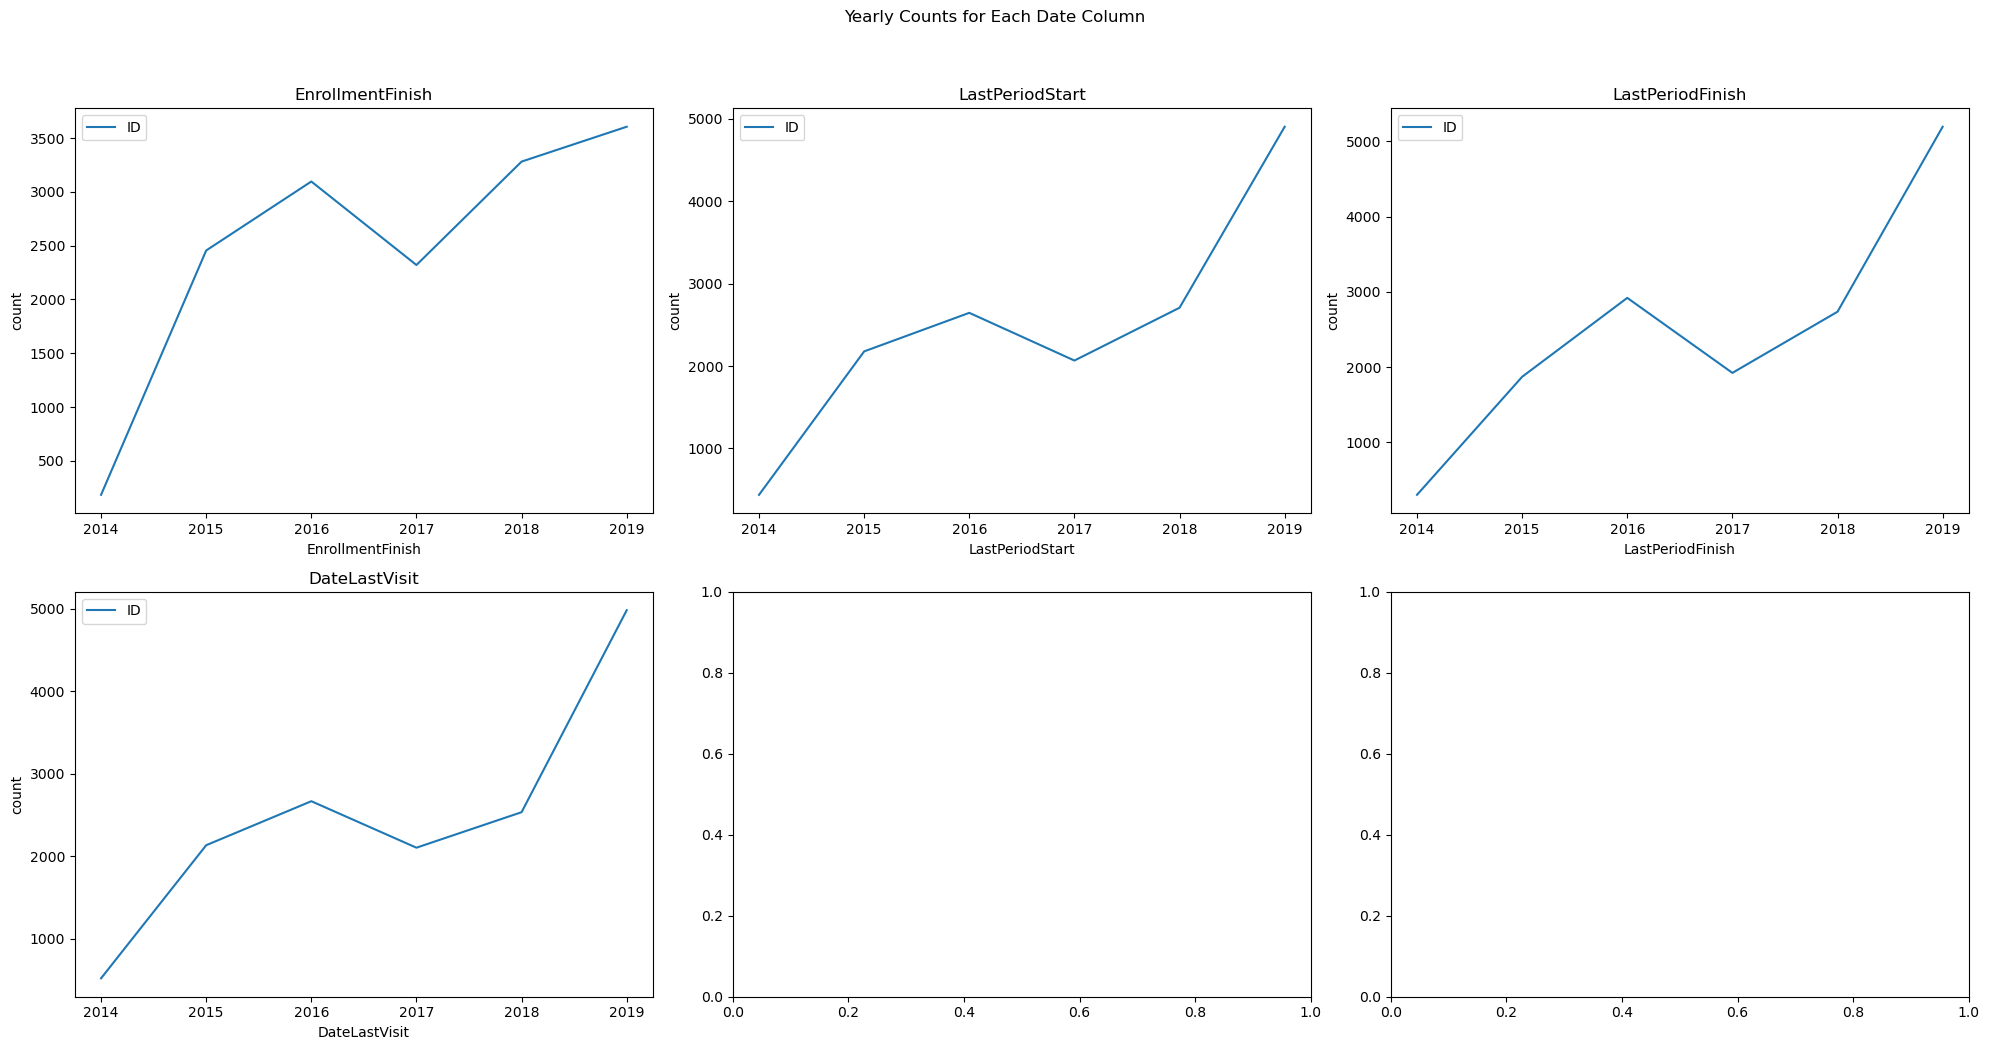

In [578]:
# Reset the index of the DataFrame, bringing 'ID' into the columns
date_df_reset = date_df.reset_index()

fig, axes = plt.subplots(2, ceil(len(date_df_reset.columns[1:]) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), date_df_reset.columns[2:]):  # Skipping the first two columns ('ID' and the first date column)
    pivot = pd.pivot_table(date_df_reset, values='ID', index=pd.to_datetime(date_df_reset[feat]).dt.year, aggfunc='count')
    pivot.plot(kind='line', xticks=pivot.index, ylabel='count', ax=ax, title=feat)

plt.suptitle("Yearly Counts for Each Date Column")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
plt.show()

In [579]:
#*************************************************** DEMOGRAPHIC ANALYSIS *****************************************************#

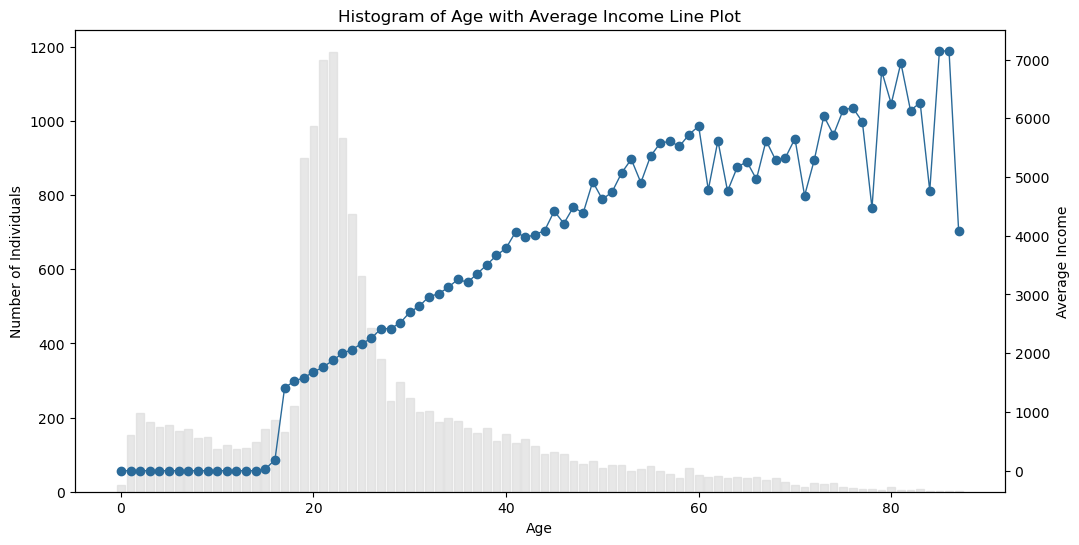

In [580]:
'''Age and Average income'''

fig, ax1 = plt.subplots(figsize=(12, 6))

# Histogram for the Age
age_counts = df['Age'].value_counts().sort_index()
ax1.bar(age_counts.index, age_counts.values, color='#DDDDDD', edgecolor='#DDDDDD', alpha=0.7)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Individuals', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for the average income
ax2 = ax1.twinx()

# Average income per age
average_income_per_age = df.groupby('Age')['Income'].mean()

# Line plot for the average income
ax2.plot(average_income_per_age.index, average_income_per_age.values, color='#2A6A99', marker='o', linestyle='-', linewidth=1)
ax2.set_ylabel('Average Income', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Histogram of Age with Average Income Line Plot')
plt.show()


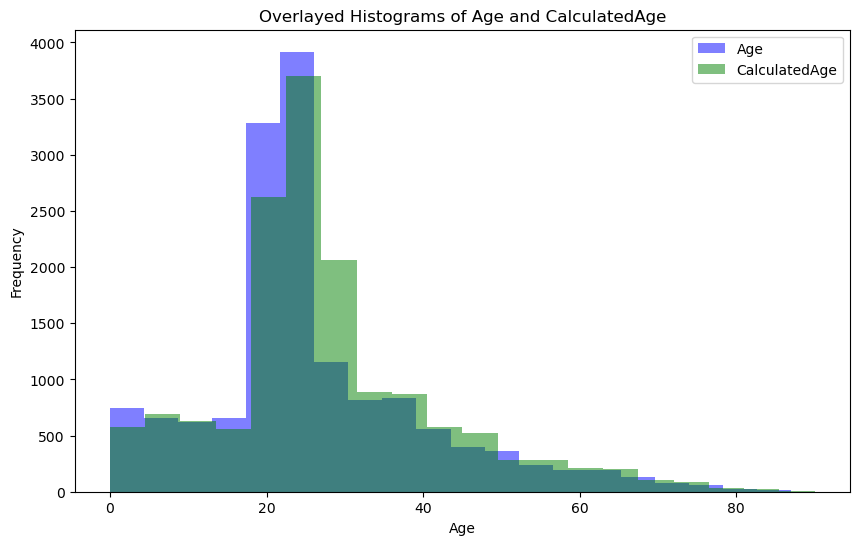

In [581]:
# Reset the index to make 'ID' a column again, if not already done
df_reset = df.reset_index()

# Now apply the calculate_age function to each row, if not already done
df_reset['CalculatedAge'] = df_reset.apply(calculate_age, axis=1)

# Create the overlayed histograms
plt.figure(figsize=(10, 6))

# Histogram for original Age
plt.hist(df_reset['Age'], bins=20, color='blue', alpha=0.5, label='Age')

# Histogram for CalculatedAge
plt.hist(df_reset['CalculatedAge'], bins=20, color='green', alpha=0.5, label='CalculatedAge')

# Add some labels and a legend
plt.title('Overlayed Histograms of Age and CalculatedAge')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


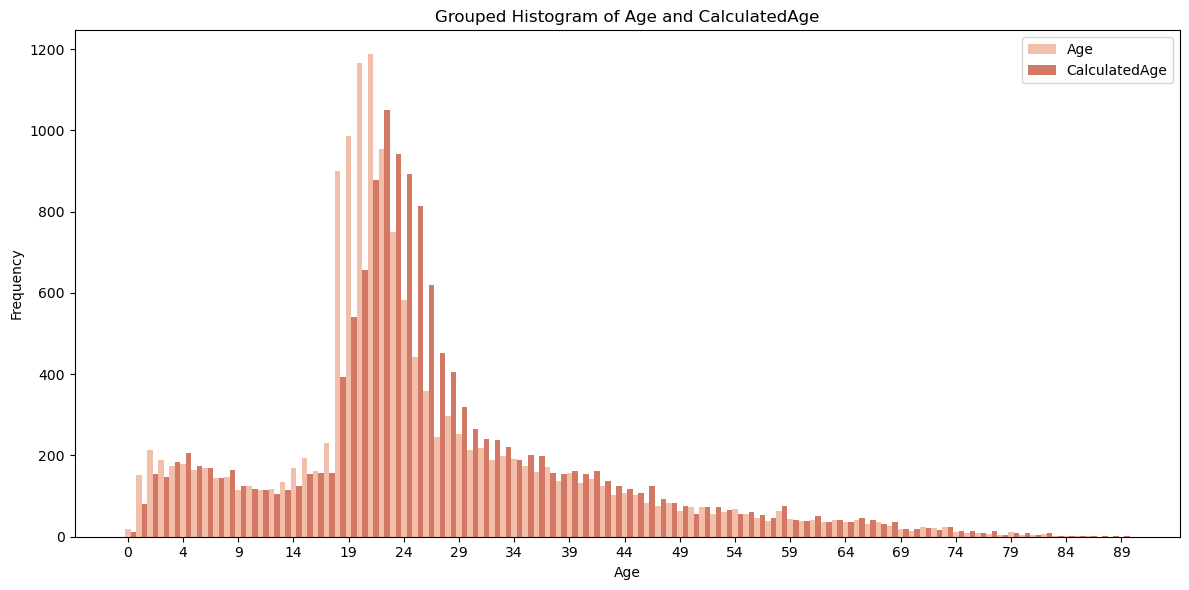

In [582]:
# Define the bin edges so that each integer age is in the center of a bin
bin_edges = np.arange(df_reset[['Age', 'CalculatedAge']].min().min() - 0.5, 
                      df_reset[['Age', 'CalculatedAge']].max().max() + 1.5)

# Calculate the counts for each bin for both 'Age' and 'CalculatedAge'
age_counts, _ = np.histogram(df_reset['Age'], bins=bin_edges)
calculated_age_counts, _ = np.histogram(df_reset['CalculatedAge'], bins=bin_edges)

# Calculate the width of each bar
bar_width = np.diff(bin_edges) / 2

# Generate the positions for each set of bars
age_bar_positions = bin_edges[:-1]
calculated_age_bar_positions = bin_edges[:-1] + bar_width

# Create the grouped bar plot
plt.figure(figsize=(12, 6))

# Plot the 'Age' bars
plt.bar(age_bar_positions, age_counts, width=bar_width, color='#eda588', alpha=0.7, label='Age')

# Plot the 'CalculatedAge' bars slightly offset
plt.bar(calculated_age_bar_positions, calculated_age_counts, width=bar_width, color='#c13f24', alpha=0.7, label='CalculatedAge')

# Add some labels and a legend
plt.title('Grouped Histogram of Age and CalculatedAge')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Adjust the x-ticks to show a selection of age values
tick_spacing = 5  # or 10 if the age range is very large
tick_labels = np.arange(bin_edges.min(), bin_edges.max(), tick_spacing)
plt.xticks(tick_labels, tick_labels.astype(int))

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [583]:
# Define the age buckets
age_buckets = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]

# New column 'AgeBucket'
df['AgeBucket'] = pd.cut(df['Age'], bins=age_buckets, right=False, labels=None)

print(df[['Age', 'AgeBucket']].head())

    Age AgeBucket
ID               
0    60  [60, 70)
1    29  [18, 30)
2    23  [18, 30)
3     9   [0, 18)
4    35  [30, 40)


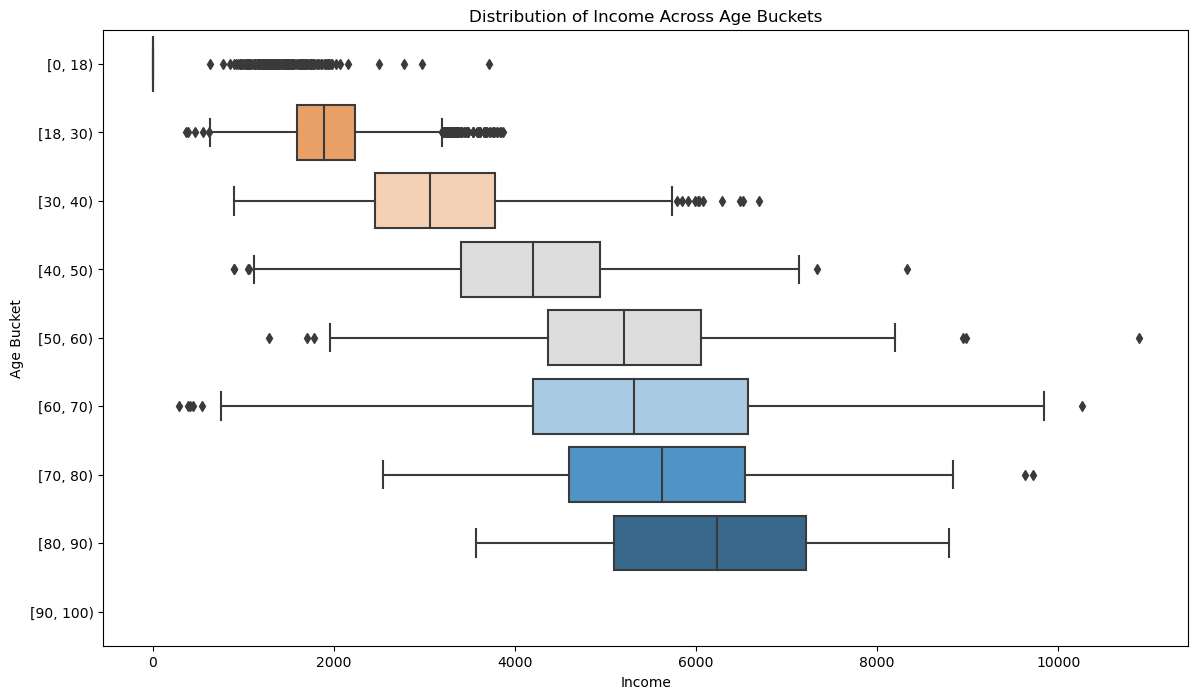

In [584]:
# Now let's create a horizontal box plot for the distribution of income for each age bucket

colors=['#B26E39', '#FE9D52', '#FFCEA9', '#DDDDDD', '#DDDDDD', '#9ECBED', '#3C97DA', '#2A6A99']

plt.figure(figsize=(14, 8))
sns.boxplot(y='AgeBucket', x='Income', data=df, orient='h', palette=colors)

# Set the title and labels
plt.title('Distribution of Income Across Age Buckets')
plt.ylabel('Age Bucket')
plt.xlabel('Income')

plt.show()

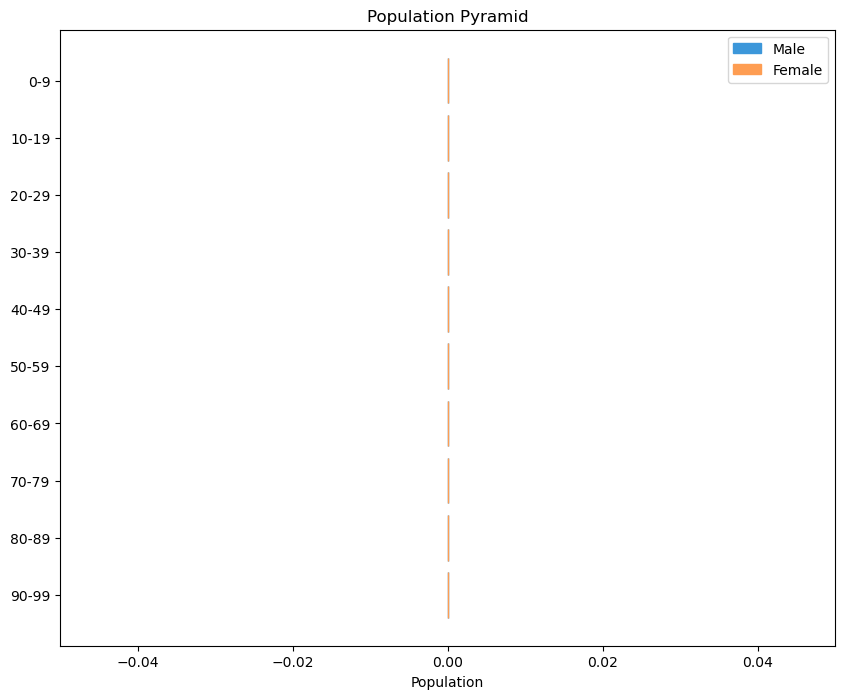

In [585]:
# Define age buckets
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['AgeBucket'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Separate the data for males and females
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Create the population pyramid plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create the bar plot for males
male_counts = df_male['AgeBucket'].value_counts().sort_index(ascending=False)
ax.barh(male_counts.index, male_counts.values, color='#3C97DA', edgecolor='#3C97DA', label='Male')

# Create the bar plot for females
female_counts = df_female['AgeBucket'].value_counts().sort_index(ascending=False)
ax.barh(female_counts.index, -female_counts.values, color='#FE9D52', edgecolor='#FE9D52', label='Female')

# Set the labels and title
ax.set_xlabel('Population')
ax.set_title('Population Pyramid')
ax.set(yticks=age_labels, yticklabels=age_labels)
max_count = max(max(male_counts.values, default=0), max(female_counts.values, default=0))
ax.set_xlim(-max_count * 1.1, max_count * 1.1)  # Widen x-axis range by 10%

# Add legend
ax.legend()

# Show the plot
plt.show()


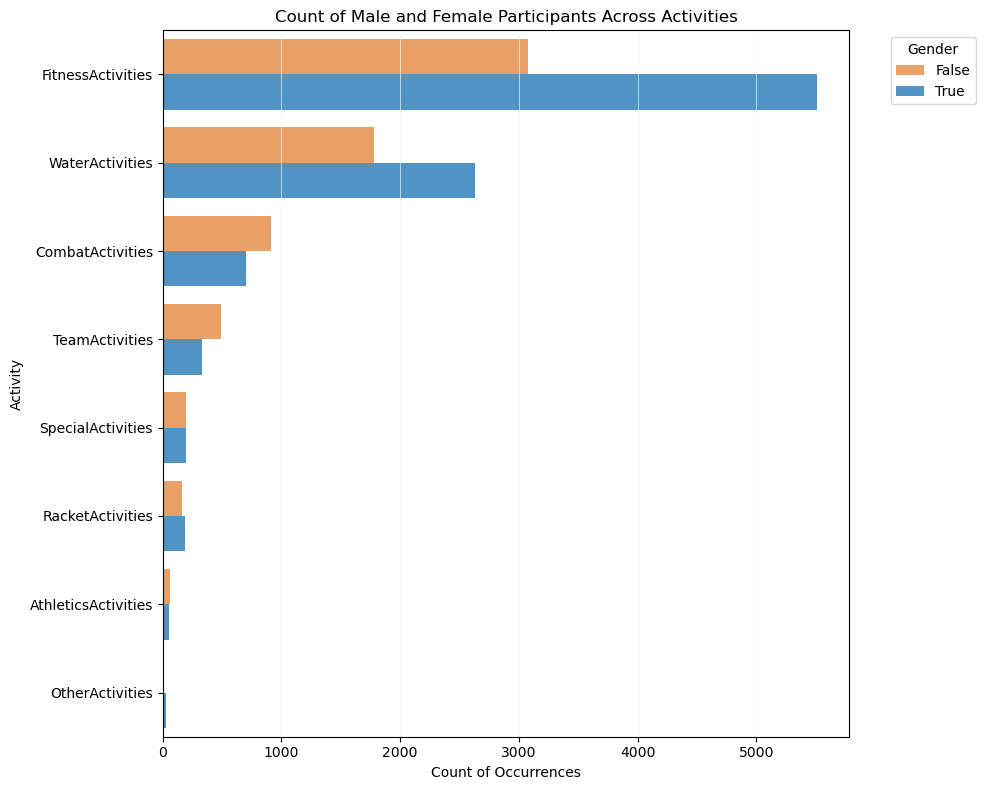

In [586]:
# Calculate the counts for each gender and activity
activity_counts = {activity: df.groupby('Gender')[activity].sum() for activity in activity_columns}

# Convert the dictionary to a DataFrame for plotting
activity_counts_df = pd.DataFrame(activity_counts).reset_index().melt(id_vars='Gender', var_name='Activity', value_name='Count')

# Sort the DataFrame in descending order of Count for each Gender
activity_counts_df.sort_values(by=['Gender', 'Count'], ascending=[True, False], inplace=True)

# Create a single bar plot for all activities
plt.figure(figsize=(10, 8))
barplot = sns.barplot(y='Activity', x='Count', hue='Gender', data=activity_counts_df, palette=['#FE9D52','#3C97DA'])

# Set the labels and title
plt.xlabel('Count of Occurrences')
plt.ylabel('Activity')
plt.title('Count of Male and Female Participants Across Activities')

# Place the legend outside the plot
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add vertical gridlines for better readability
plt.grid(axis='x', which='major', color='#F2F2F2', linestyle='-', linewidth=0.5)

# # Add the number of occurrences at the end of each bar with integer formatting in dark gray
# for p in barplot.patches:
#     barplot.annotate(format(int(p.get_width())),  # Convert to integer to remove .0
#                      (p.get_width(), p.get_y() + p.get_height() / 2.), 
#                      ha = 'center', va = 'center', 
#                      xytext = (12, 0), 
#                      textcoords = 'offset points',
#                      color = '#BFBFBF',  # Change the text color to dark gray
#                      fontsize = 8)  # Reduce the font size

# Adjust layout to prevent clipping of ylabel/tick labels
plt.tight_layout()

# Show the plot
plt.show()


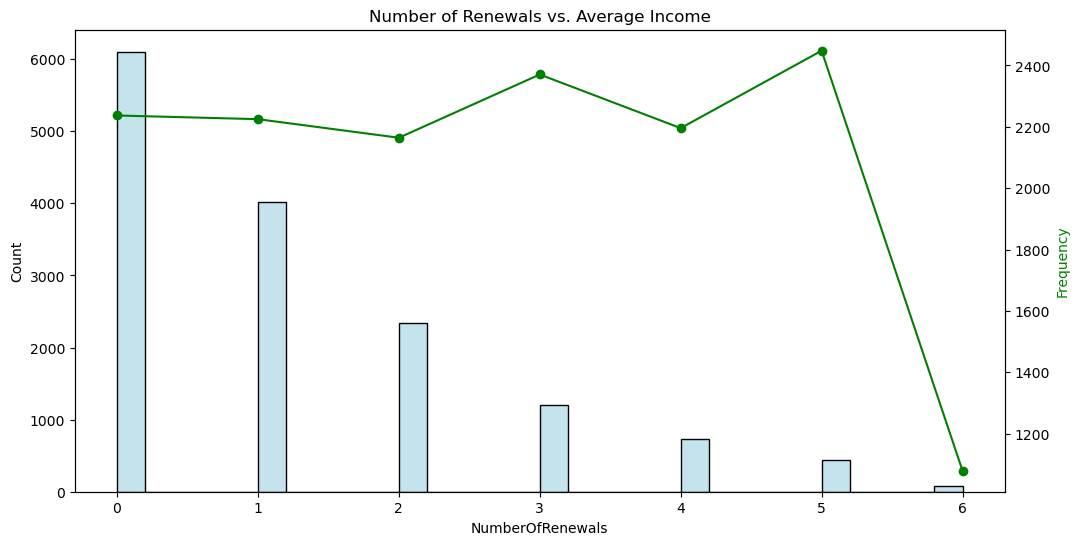

In [587]:
# Create a histogram for the number of renewals
plt.figure(figsize=(12, 6))
sns.histplot(df['NumberOfRenewals'], bins=30, color='lightblue', edgecolor='black', alpha=0.7)

# Create a secondary axis for the average income
ax2 = plt.gca().twinx()

# Calculate the average income per number of renewals
mean_income = df.groupby('NumberOfRenewals')['Income'].mean()

# Plot the average income
ax2.plot(mean_income.index, mean_income.values, color='green', marker='o', linestyle='-')
ax2.set_ylabel('Average Income', color='green')

# Set labels and title
plt.xlabel('Number of Renewals')
plt.ylabel('Frequency')
plt.title('Number of Renewals vs. Average Income')

# Show the plot
plt.show()


In [588]:
################################################ Nr. of Real Visits per Year ###################################################
yearly_dropouts = df.groupby(df['LastPeriodFinish'].dt.year)['RealNumberOfVisits'].count()
sorted_yearly_dropouts = yearly_dropouts.sort_values(ascending=False)
print(sorted_yearly_dropouts)

LastPeriodFinish
2019    5194
2016    2919
2018    2735
2017    1922
2015    1870
2014     301
Name: RealNumberOfVisits, dtype: int64


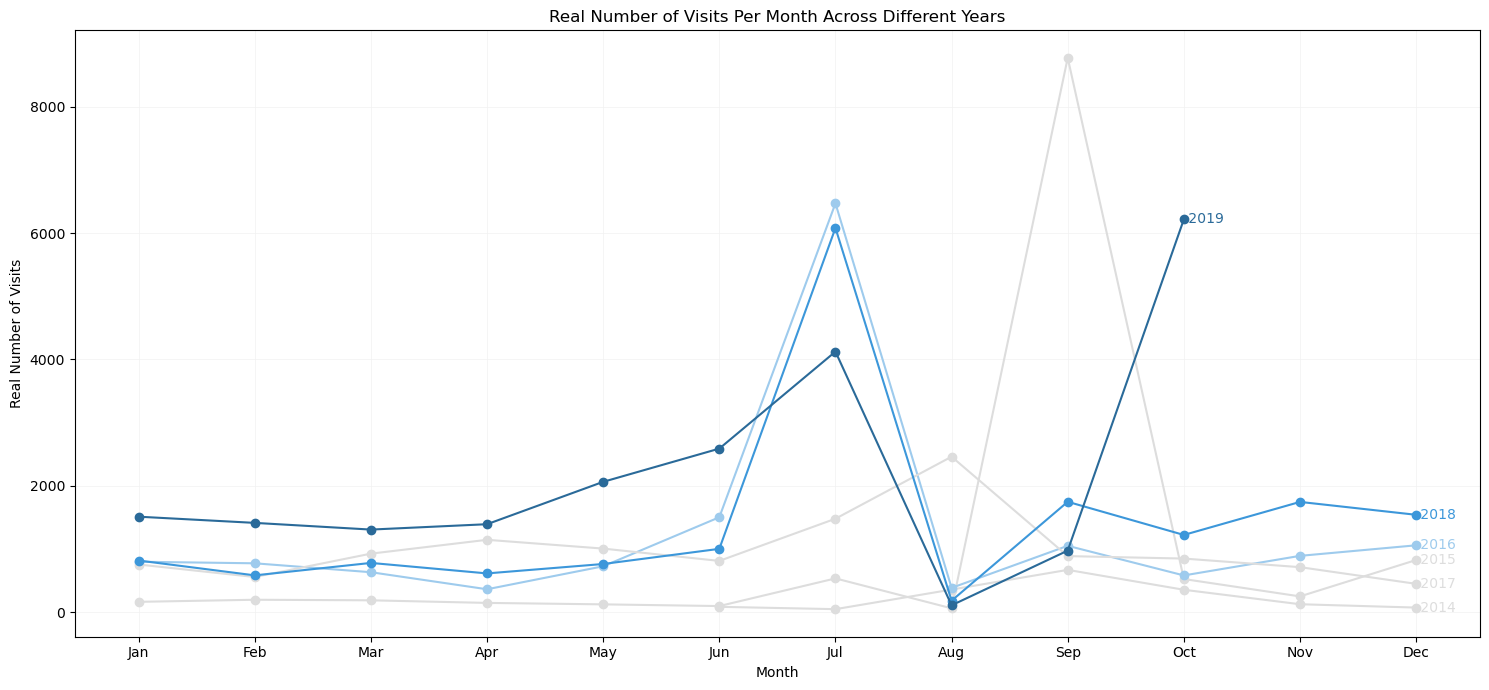

In [589]:
# Extract year and month
df['Year'] = df['EnrollmentFinish'].dt.year
df['Month'] = df['EnrollmentFinish'].dt.month

# Group by year and month, then sum the 'RealNumberOfVisits'
visits_by_month_year = df.groupby(['Year', 'Month'])['RealNumberOfVisits'].sum().reset_index()

# Sort the DataFrame by year and then by month to ensure correct order
visits_by_month_year.sort_values(by=['Year', 'Month'], inplace=True)

# Define a color palette
colors = ['#DDDDDD','#DDDDDD','#9ECBED', '#DDDDDD', '#3C97DA', '#2A6A99']

# Plot the data
plt.figure(figsize=(15, 7))

# Plot each year as a separate line with markers and specific colors
for idx, year in enumerate(sorted(visits_by_month_year['Year'].unique())):
    year_data = visits_by_month_year[visits_by_month_year['Year'] == year]
    color = colors[idx % len(colors)]  # Cycle through the color palette
    plt.plot(year_data['Month'], year_data['RealNumberOfVisits'], marker='o', label=year, color=color)

    # Annotate the line with the year, positioned near the last data point
    last_month = year_data['Month'].values[-1]
    last_count = year_data['RealNumberOfVisits'].values[-1]
    plt.text(last_month, last_count, f' {year}', color=color, verticalalignment='center')

plt.title('Real Number of Visits Per Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Real Number of Visits')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Month abbreviations
plt.grid(True, color='#F2F2F2', linestyle='-', linewidth=0.5)
#plt.legend(title='Year', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [590]:
################################################ Nr. of Dropouts per Year ####################################################
yearly_dropouts = df[df['Dropout'] == 1].groupby(df['LastPeriodFinish'].dt.year)['Dropout'].count()
sorted_yearly_dropouts = yearly_dropouts.sort_values(ascending=False)
print(sorted_yearly_dropouts)

LastPeriodFinish
2016    2894
2018    2598
2019    2418
2017    1891
2015    1865
2014     301
Name: Dropout, dtype: int64


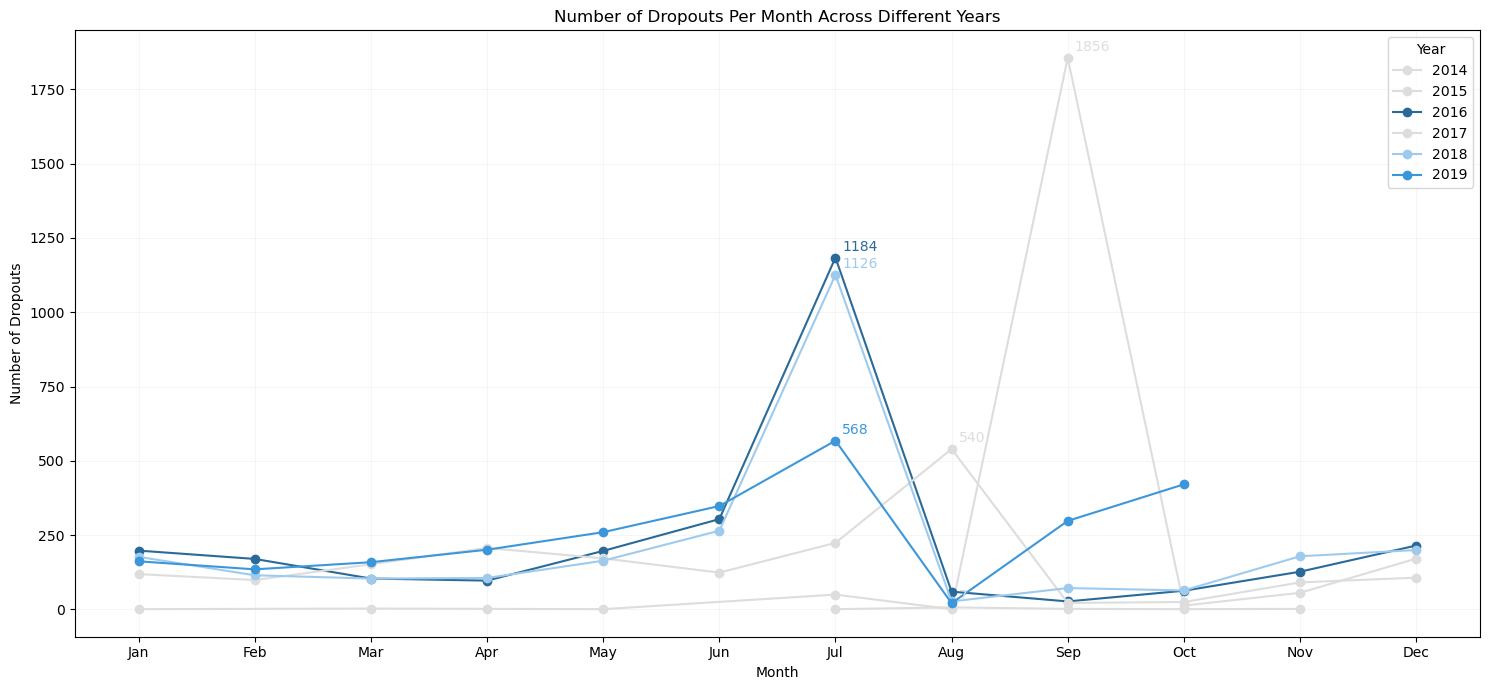

In [591]:
# Filter for dropouts
dropout_df = df[df['Dropout'] == 1]

# Extract year and month
dropout_df['Year'] = dropout_df['EnrollmentFinish'].dt.year
dropout_df['Month'] = dropout_df['EnrollmentFinish'].dt.month

# Group by year and month, then count
dropouts_by_month_year = dropout_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Sort the DataFrame by year and then by month to ensure correct order
dropouts_by_month_year.sort_values(by=['Year', 'Month'], inplace=True)

# Define a color palette
colors = ['#DDDDDD','#DDDDDD','#2A6A99', '#DDDDDD', '#9ECBED', '#3C97DA']
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Add more colors if needed

# Plot the data
plt.figure(figsize=(15, 7))

# Plot each year as a separate line with markers and specific colors
for idx, year in enumerate(sorted(dropouts_by_month_year['Year'].unique())):
    year_data = dropouts_by_month_year[dropouts_by_month_year['Year'] == year]
    color = colors[idx % len(colors)]  # Cycle through the color palette
    plt.plot(year_data['Month'], year_data['Count'], marker='o', label=year, color=color)

    # Annotate the peak for each year
    if not year_data['Count'].empty:
        peak_month = year_data.loc[year_data['Count'].idxmax(), 'Month']
        peak_count = year_data['Count'].max()
        plt.annotate(f"{int(peak_count)}", 
                     xy=(peak_month, peak_count), 
                     xytext=(5, 5), 
                     textcoords='offset points', 
                     color=color)

plt.title('Number of Dropouts Per Month Across Different Years')
plt.xlabel('Month')
plt.ylabel('Number of Dropouts')
plt.xticks(range(1, 13), [calendar.month_abbr[i] for i in range(1, 13)])  # Month abbreviations
plt.grid(True, color='#F2F2F2', linestyle='-', linewidth=0.5)
plt.legend(title='Year')
plt.tight_layout()

# Show the plot
plt.show()


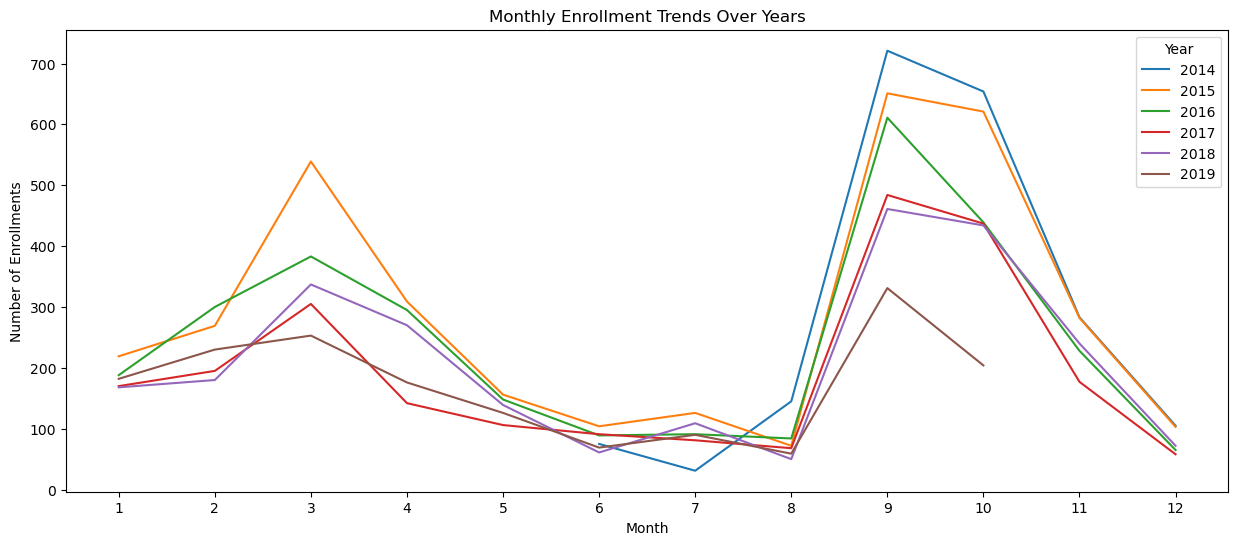

In [592]:
# Extract year and month from 'EnrollmentStart'
df['Year'] = df['EnrollmentStart'].dt.year
df['Month'] = df['EnrollmentStart'].dt.month

# Group by year and month, then count the number of enrollments
monthly_enrollment_trends = df.groupby(['Year', 'Month']).size().unstack(level=0)

# Plotting trends over years
plt.figure(figsize=(15, 6))

for year in monthly_enrollment_trends.columns:
    plt.plot(monthly_enrollment_trends.index, monthly_enrollment_trends[year], label=year)

plt.title('Monthly Enrollment Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.legend(title='Year')
plt.xticks(range(1, 13))  
plt.show()

# Data Pre-processing

## Missing Values

In [593]:
# missing values
missings = {}
for col in df.columns:
    if df[col].isna().sum() > 0:
        missings[col] = [df[col].isna().sum()]
        missings[col].append(((missings[col][0]/nrows)*100).round(3))
        
print(f'Columns with missing values:') 
missings

Columns with missing values:


{'Income': [512, 3.427],
 'AthleticsActivities': [36, 0.241],
 'WaterActivities': [37, 0.248],
 'FitnessActivities': [35, 0.234],
 'TeamActivities': [35, 0.234],
 'RacketActivities': [37, 0.248],
 'CombatActivities': [33, 0.221],
 'SpecialActivities': [44, 0.294],
 'OtherActivities': [35, 0.234],
 'NumberOfFrequencies': [26, 0.174],
 'AllowedWeeklyVisitsBySLA': [535, 3.581],
 'HasReferences': [12, 0.08]}

In [594]:
# Calculate the number of missing values per column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values per column
missing_percentage = (missing_count / len(df) * 100).round(2).apply(lambda x: '{:.2f}%'.format(x))

# Create a DataFrame to display the results
missing_info = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})

# Print the missing information
columns_with_missing = missing_info[missing_info['Missing Count'] > 0]
columns_with_missing

,Missing Count,Missing Percentage
Income,512,3.43%
AthleticsActivities,36,0.24%
WaterActivities,37,0.25%
FitnessActivities,35,0.23%
TeamActivities,35,0.23%
RacketActivities,37,0.25%
CombatActivities,33,0.22%
SpecialActivities,44,0.29%
OtherActivities,35,0.23%
NumberOfFrequencies,26,0.17%


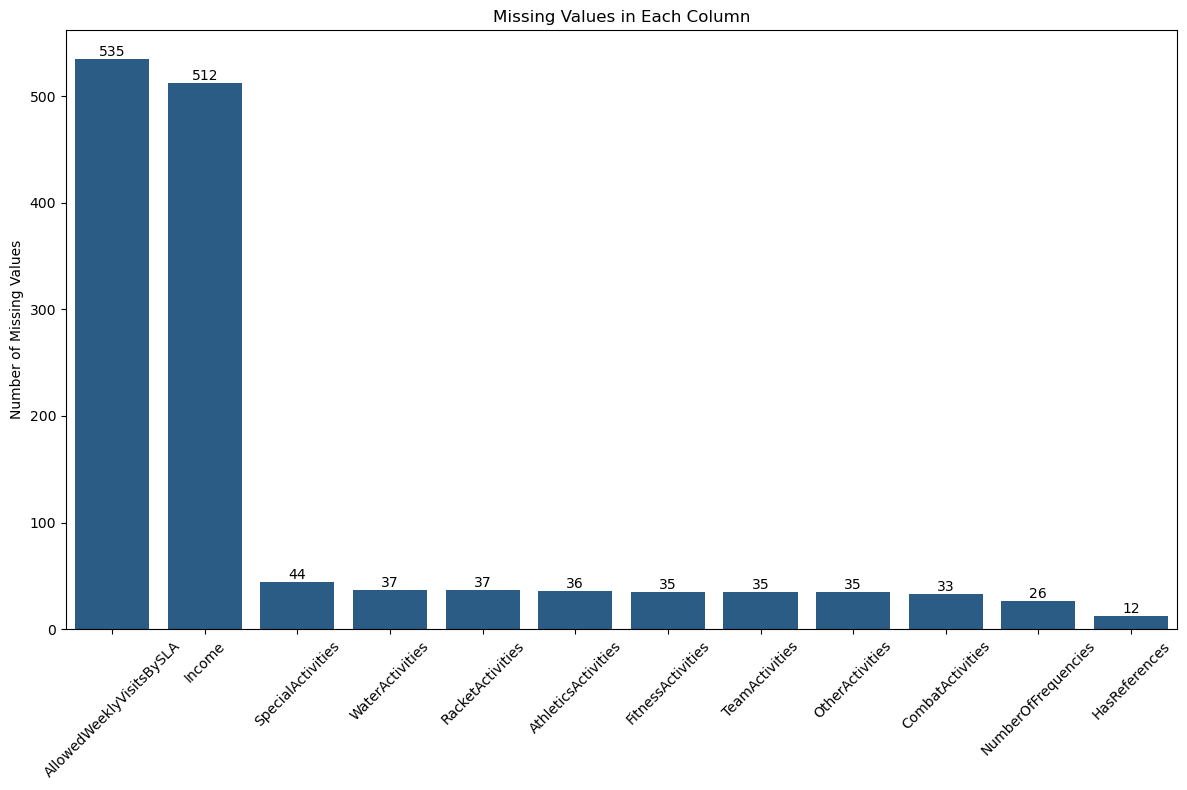

In [595]:
# Nr of missing values per column
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0]  
missing_values_sorted = missing_values.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values_sorted.index, y=missing_values_sorted.values, palette=['#1c5d94'])

plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45)  

for index, value in enumerate(missing_values_sorted.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

## Scaling

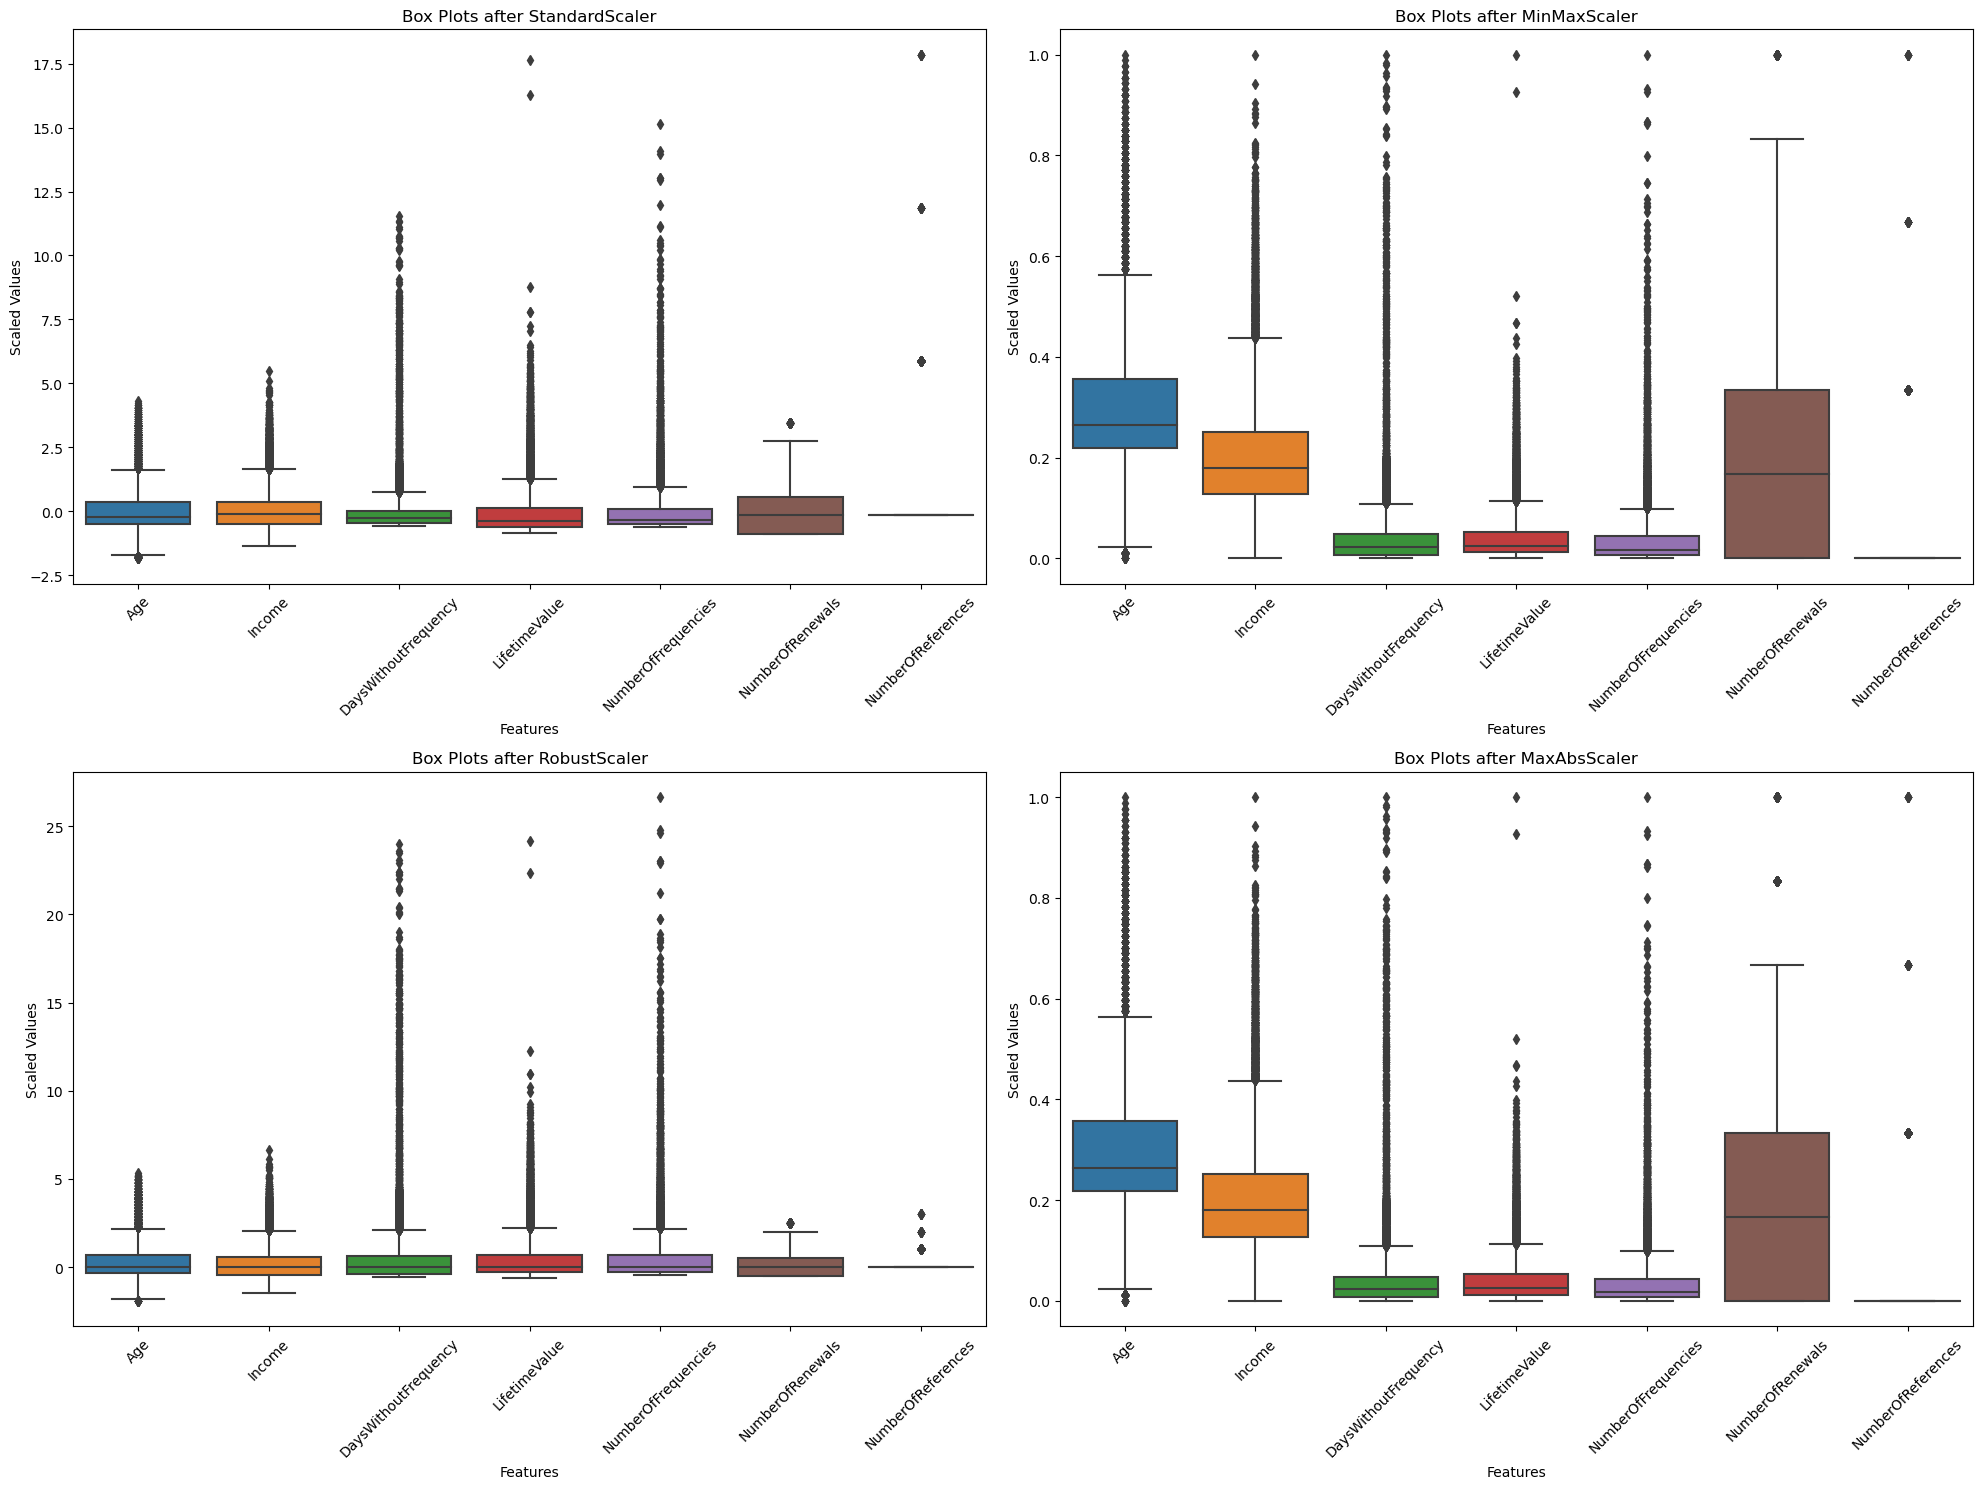

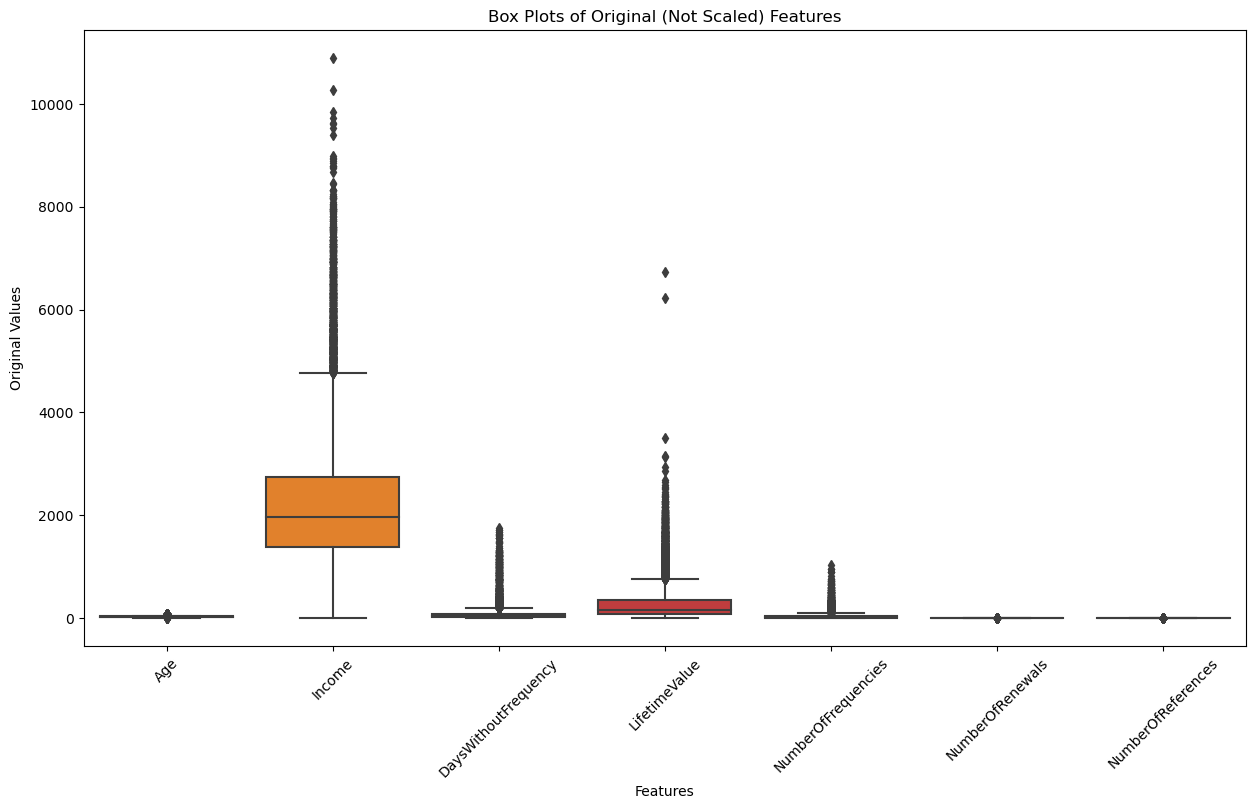

In [596]:
# Selecting a subset of numerical features for scaling
features_to_scale = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 
                     'NumberOfFrequencies', 'NumberOfRenewals', 'NumberOfReferences'
                    ] #'MembershipDuration', 'AvgMonthlySpending'


# Extracting the features
features = df[features_to_scale].fillna(0)  # Temporarily filling NaNs with 0
features.replace([np.inf, -np.inf], np.nan, inplace=True)
# Applying different scaling techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

scaled_data_before_imputation = {}
for scaler_name, scaler in scalers.items():
    scaled = scaler.fit_transform(features)
    scaled_data_before_imputation[scaler_name] = pd.DataFrame(scaled, columns=features_to_scale)

# Creating visualizations to compare the distributions after scaling
plt.figure(figsize=(20, 15))
for i, (scaler_name, scaled_df) in enumerate(scaled_data_before_imputation.items(), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=scaled_df)
    plt.title(f'Box Plots after {scaler_name}')
    plt.xlabel('Features')
    plt.ylabel('Scaled Values')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting box plots for original (not scaled) features
plt.figure(figsize=(15, 8))
sns.boxplot(data=features)
plt.title('Box Plots of Original (Not Scaled) Features')
plt.xlabel('Features')
plt.ylabel('Original Values')
plt.xticks(rotation=45)
plt.show()


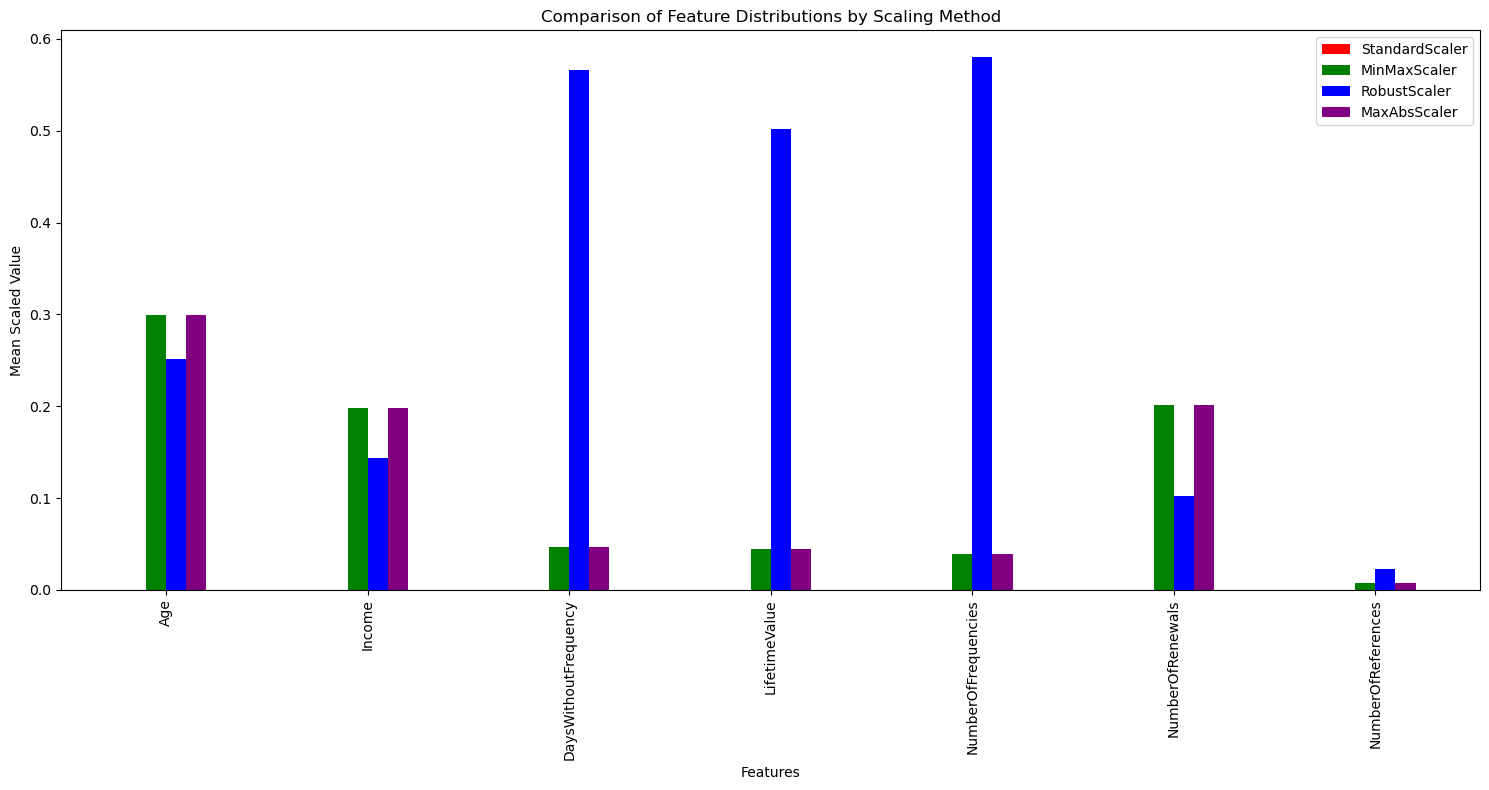

In [597]:
# Define colors for each scaler for better visibility
colors = ['red', 'green', 'blue', 'purple']

# Set the positions of the bars on the x-axis and width of each bar
bar_width = 0.2
n_features = len(features_to_scale)
index = np.arange(n_features) * 2  # Spacing between groups

# Plot the bar chart
plt.figure(figsize=(15, 8))

for i, (scaler_name, scaled_df) in enumerate(scaled_data_before_imputation.items()):
    # Compute the mean for each feature in the scaled data
    means = scaled_df.mean(axis=0)
    # Create the bar positions for this group of bars
    bar_positions = index + i * bar_width
    # Plotting bars for each feature
    plt.bar(bar_positions, means, width=bar_width, label=scaler_name, color=colors[i])

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Mean Scaled Value')
plt.title('Comparison of Feature Distributions by Scaling Method')
plt.xticks(index + bar_width * (len(scaled_data_before_imputation) - 1) / 2, features_to_scale, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

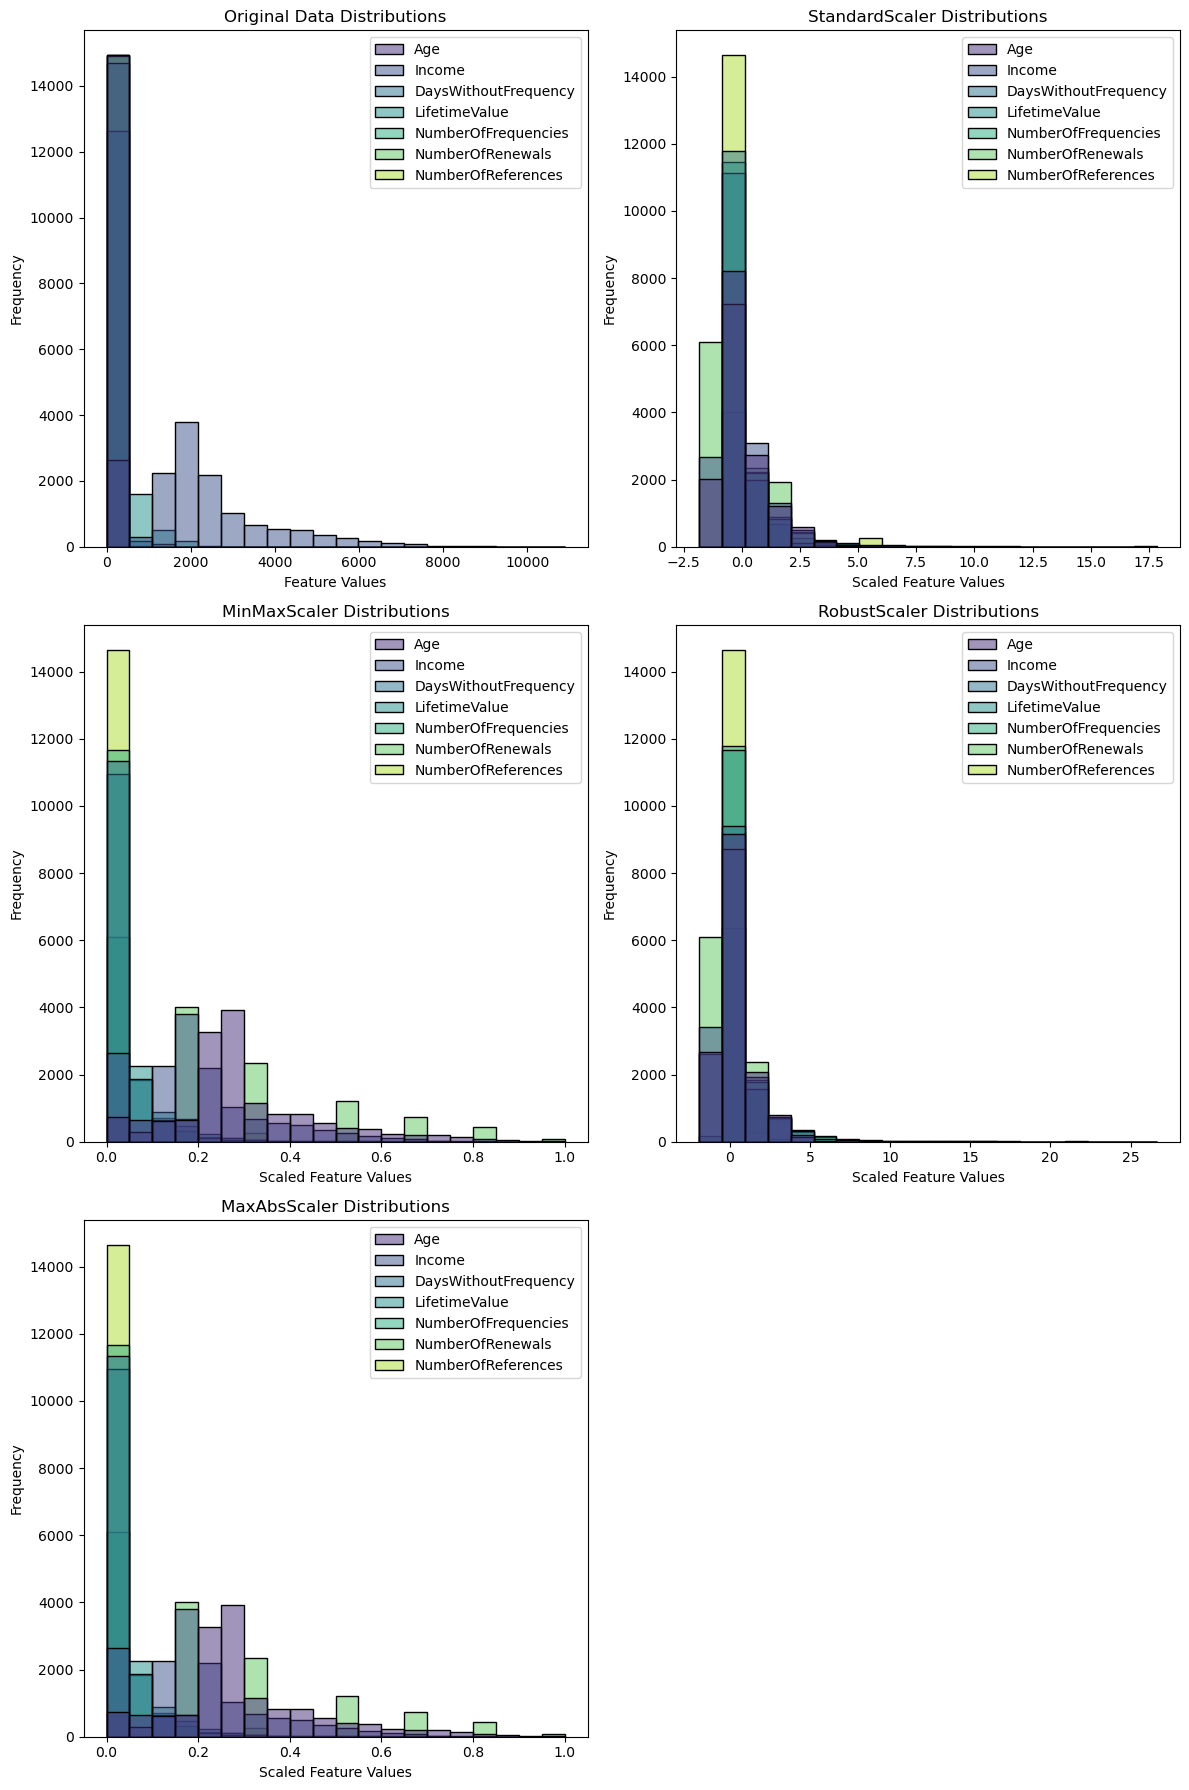

In [598]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Original data histogram
sns.histplot(data=features.fillna(0), bins=20, ax=axes[0], palette='viridis', edgecolor='black')
axes[0].set_title('Original Data Distributions')
axes[0].set_xlabel('Feature Values')
axes[0].set_ylabel('Frequency')

# Histograms for scaled data
for i, (scaler_name, scaled_df) in enumerate(scaled_data_before_imputation.items(), 1):
    sns.histplot(data=scaled_df, bins=20, ax=axes[i], palette='viridis', edgecolor='black')
    axes[i].set_title(f'{scaler_name} Distributions')
    axes[i].set_xlabel('Scaled Feature Values')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(len(scaled_data_before_imputation) + 1, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [599]:
'''
# Set the number of subplots based on the number of scaling methods + 1 for the original features
n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15), constrained_layout=True)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Original Features Histogram
sns.histplot(features, bins=20, kde=False, ax=axes[0], edgecolor='black')
axes[0].set_title('Original Feature Distributions')
axes[0].legend(labels=features_to_scale)

# Histograms for each scaling method
for i, (scaler_name, scaled_df) in enumerate(scaled_data_before_imputation.items(), 1):
    sns.histplot(scaled_df, bins=20, kde=False, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{scaler_name} Feature Distributions')
    axes[i].legend(labels=features_to_scale)

# If there are any empty subplots, hide them
for i in range(len(scaled_data_before_imputation) + 1, n_rows * n_cols):
    axes[i].set_visible(False)

plt.show()
'''

"\n# Set the number of subplots based on the number of scaling methods + 1 for the original features\nn_rows = 3\nn_cols = 2\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15), constrained_layout=True)\n\n# Flatten the axes array for easy indexing\naxes = axes.flatten()\n\n# Original Features Histogram\nsns.histplot(features, bins=20, kde=False, ax=axes[0], edgecolor='black')\naxes[0].set_title('Original Feature Distributions')\naxes[0].legend(labels=features_to_scale)\n\n# Histograms for each scaling method\nfor i, (scaler_name, scaled_df) in enumerate(scaled_data_before_imputation.items(), 1):\n    sns.histplot(scaled_df, bins=20, kde=False, ax=axes[i], edgecolor='black')\n    axes[i].set_title(f'{scaler_name} Feature Distributions')\n    axes[i].legend(labels=features_to_scale)\n\n# If there are any empty subplots, hide them\nfor i in range(len(scaled_data_before_imputation) + 1, n_rows * n_cols):\n    axes[i].set_visible(False)\n\nplt.show()\n"

## Imputation

### Specific Options
- **activities** : We will assume that customers with NaN values in activites did not enrolled at all.
- **HasReferences** : Fill NA-values based on the values of column of *NumberOfReferences*.
- **NumberOfFrequencies** : Since there is not a way to calculate the number of visits to the sports facility between the date indicated in EnrollmentStart and the date indicated in EnrollmentFinish, and since only a percentage of 0.17% will be deleted leaving us with 99.83% of the initial dataset, we choose to drop NA-values of this variable.
- **Income** : Based on previous arguments, we choose to  fill all NaNs with zero if the corresponding age is <18. For the rest missing values of 'Income', a first trial of filling NaNs was made with k-nearest neighbors but the results did not make any sense, thus we follow the assumption that all empty values of 'Income' are indicating zero income.
- **AllowedWeeklyVisitsBySLA**

    Note: A Service Level Agreement (SLA) is a contract between a service provider and a customer that defines the level of service expected from the provider.

    We try to find a *pattern* between WeeklyVisits and NumberOfVisits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish).

    Observing the data, a pattern has been revealed: the AllowedNumberOfVisitsBySLA to the facilities is (in most entities*) the number of visits that the customer can make in two months (as an example, observing the row with ID=1 and with AllowedNumberOfVisitsBySla value = 17.42, we do 17.42 * 7 (7 days in a week) / 61 (assuming that 2 months = 30 + 31 days) = 1.99 ~ 2 = AllowedWeeklyVisitsBySLA).

    *Sometimes this pattern uses the number of visits made in one month and not two, but there was no obvious reason/pattern for this observation regarding the duration between LastPeriodStart and LastPeriodFinish so we choose to apply this pattern using 61 days.

In [600]:
# activities
for act in range(len(Activities)):
    df[Activities[act]].fillna(0.0, inplace=True)

# HasReferences
nans_references = df.HasReferences.isna()
df['HasReferences'] = df['HasReferences'].fillna(df['NumberOfReferences'].map(lambda x: 'False' if x == 0 else 'True'))
#df[nans_references]

# NumberOfFrequencies
df = df.dropna(subset=['NumberOfFrequencies'])

# Income
df.Income.fillna(0, inplace=True)

# AllowedWeeklyVisitsBySLA
df["Pattern"] = ((df.AllowedNumberOfVisitsBySLA)*7/61).round(0)
nans_indexes_weeklyvisits = df.AllowedWeeklyVisitsBySLA.isna()
df.AllowedWeeklyVisitsBySLA = df.AllowedWeeklyVisitsBySLA.fillna(df['Pattern'])
df.drop(columns='Pattern', inplace=True)

### Median/Mode Option

| Feature                    | Imputation Method    | Reason                                         |
|----------------------------|----------------------|------------------------------------------------|
| Income                     | Median Imputation    | Skewed distribution (rightward)                |
| AllowedWeeklyVisitsBySLA   | Median Imputation    | Skewed distribution (leftward)                 |
| NumberOfFrequencies        | Median Imputation    | Skewed distribution (rightward)                |
| NatureActivities           | Mode Imputation      | Binary/Categorical data                        |
| SpecialActivities          | Mode Imputation      | Binary/Categorical data                        |
| RacketActivities           | Mode Imputation      | Binary/Categorical data                        |
| WaterActivities            | Mode Imputation      | Binary/Categorical data                        |
| DanceActivities            | Mode Imputation      | Binary/Categorical data                        |
| AthleticsActivities        | Mode Imputation      | Binary/Categorical data                        |
| OtherActivities            | Mode Imputation      | Binary/Categorical data                        |
| TeamActivities             | Mode Imputation      | Binary/Categorical data                        |
| FitnessActivities          | Mode Imputation      | Binary/Categorical data                        |
| CombatActivities           | Mode Imputation      | Binary/Categorical data                        |
| HasReferences              | Median Imputation    | Safe choice if distribution unknown or skewed |


In [601]:
# Median Imputation for 'Income', 'AllowedWeeklyVisitsBySLA', and 'NumberOfFrequencies'
median_impute_cols = ['Income', 'AllowedWeeklyVisitsBySLA', 'NumberOfFrequencies']
for col in median_impute_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

# Mode Imputation for Activity-Related Features
mode_impute_cols = ['SpecialActivities', 'RacketActivities', 
                    'WaterActivities', 'AthleticsActivities', 
                    'OtherActivities', 'TeamActivities', 'FitnessActivities', 'CombatActivities']
for col in mode_impute_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# For 'HasReferences', using median imputation as a safe choice if distribution is unknown or skewed
#df['HasReferences'].fillna(df['HasReferences'].median(), inplace=True)

In [602]:
print(f'Percentage of missing values in total = {(((df.isna().sum()).sum()/nrows)*100).round(3)}')

Percentage of missing values in total = 0.0


# Feature Engineering

In [603]:
df.reset_index(inplace=True) # reset index as we will need col 'ID' 

## New features

| Feature Name             | Feature Description                                                                           | Data Type         |
|--------------------------|-----------------------------------------------------------------------------------------------|-------------------|
| `MembershipDuration`     | The number of days between the start and finish of the user's enrollment.                     | Integer           |
| `AvgMonthlySpending`     | The average amount spent by the user per month during their membership.                       | Float             |
| `ActivityDiversityScore` | A count of the different types of activities in which a user was involved.                    | Integer           |
| `VisitFrequency`         | The average number of visits per month by the user to the facility.                           | Float             |
| `ClassAttendanceRatio`   | The ratio of the number of classes attended to the total number of facility visits.           | Float             |
| `DropoutRiskScore`       | A score representing the likelihood of the user dropping out, based on days without frequency.| Float             |
| `UtilizationRatio`       | The ratio of the actual number of visits to the allowed number of visits as per the SLA.      | Float             |
| `AgeGroup`               | Categorical representation of the user's age group.                                           | Categorical       |
| `IncomeBracket`          | Categorical representation of the user's income bracket.                                      | Categorical       |
| `LastActivityRecency`    | The number of days since the user's last visit to the facility.                               | Integer           |
| `EngagementScore`        | A composite score based on visit frequency, class attendance ratio, and activity diversity.   | Float             |
| `EnrollmentStartMonth`   | The month when the user's enrollment started.                                                 | Integer (Month)   |
| `EnrollmentStartYear`    | The year when the user's enrollment started.                                                  | Integer (Year)    |
| `DateLastVisitMonth`     | The month when the user last visited the facility.                                            | Integer (Month)   |
| `DateLastVisitYear`      | The year when the user last visited the facility.                                             | Integer (Year)    |
| `RevenuePerVisit`        | The average revenue generated from the user per visit.                                        | Float             |
| `Season`        | Season of the year.                                        | Categorical             |


In [604]:
# 1. Membership Duration in days
df['MembershipDuration'] = (df['EnrollmentFinish'] - df['EnrollmentStart']).dt.days

In [605]:
# 2. Average Monthly Spending
months_duration = df['MembershipDuration'] / 30
df['AvgMonthlySpending'] = df['LifetimeValue'] / months_duration

In [606]:
# 3. Activity Diversity Score
activity_columns = ['UseByTime', 'AthleticsActivities', 'WaterActivities', 'FitnessActivities',
                    'TeamActivities', 'RacketActivities', 'CombatActivities',
                    'SpecialActivities', 'OtherActivities']
df['ActivityDiversityScore'] = df[activity_columns].sum(axis=1)
df.ActivityDiversityScore.value_counts()

1.0    12985
2.0     1689
3.0      179
0.0       39
4.0       20
5.0        3
Name: ActivityDiversityScore, dtype: int64

In [607]:
# 4. Visit Frequency
df['VisitFrequency'] = df['NumberOfFrequencies'] / months_duration

In [608]:
# 5. Class Attendance Ratio
df['ClassAttendanceRatio'] = df['AttendedClasses'] / df['NumberOfFrequencies']

In [609]:
# 6. Dropout Risk Score
max_days_without = df['DaysWithoutFrequency'].max()
df['DropoutRiskScore'] = df['DaysWithoutFrequency'] / max_days_without

In [610]:
# 7. Utilization Ratio
df['UtilizationRatio'] = df['RealNumberOfVisits'] / df['AllowedNumberOfVisitsBySLA']
df['UtilizationRatio'] = df['UtilizationRatio'].fillna(0)
df['UtilizationRatio'] = df['UtilizationRatio'].replace([float('inf'), -float('inf')], 0)

In [611]:
# 8. Age Group
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '>65']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [612]:
# 9. Income Bracket
income_bins = [0, 1000, 3000, 5000, 7000, 10000, float('inf')]
income_labels = ['<1000', '1000-3000', '3000-5000', '5000-7000', '7000-10000', '>10000']
df['IncomeBracket'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

In [613]:
# 10. Last Activity Recency
current_date = pd.Timestamp(2019, 10, 31)
df['LastActivityRecency'] = (current_date - df['DateLastVisit']).dt.days

In [614]:
# 11. Engagement Score
df['VisitFrequencyNorm'] = df['VisitFrequency'] / df['VisitFrequency'].max()
df['ClassAttendanceRatioNorm'] = df['ClassAttendanceRatio'].fillna(0)
df['ClassAttendanceRatioNorm'] = df['ClassAttendanceRatioNorm'] / df['ClassAttendanceRatioNorm'].max()
df['ActivityDiversityScoreNorm'] = df['ActivityDiversityScore'] / df['ActivityDiversityScore'].max()
df['EngagementScore'] = (df['VisitFrequencyNorm'] + df['ClassAttendanceRatioNorm'] + df['ActivityDiversityScoreNorm']) / 3

In [615]:
# 12 Season of Enrollment Start
df['EnrollmentMonth'] = df['EnrollmentStart'].dt.month
df['StartSeason'] = df['EnrollmentMonth'].apply(lambda x: 'Spring' if 3 <= x <= 5 else
                                                       'Summer' if 6 <= x <= 8 else
                                                       'Autumn' if 9 <= x <= 11 else
                                                       'Winter')

In [616]:
# 13 Season of Enrollment Finnish
df['EnrollmentMonth'] = df['EnrollmentFinish'].dt.month
df['EndSeason'] = df['EnrollmentMonth'].apply(lambda x: 'Spring' if 3 <= x <= 5 else
                                                       'Summer' if 6 <= x <= 8 else
                                                       'Autumn' if 9 <= x <= 11 else
                                                       'Winter')

#### Inspection of certain issues after feature engineering

In [617]:
#df["LastPeriodDurationDays"] = (df.LastPeriodFinish - df.LastPeriodStart).dt.days

df[(df['NumberOfRenewals'] != 0) & (df['Dropout'] == 0 )]['MembershipDuration'].value_counts()

0    2417
Name: MembershipDuration, dtype: int64

In [618]:
df[df['MembershipDuration'] == 0]

,ID,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,...,AgeGroup,IncomeBracket,LastActivityRecency,VisitFrequencyNorm,ClassAttendanceRatioNorm,ActivityDiversityScoreNorm,EngagementScore,EnrollmentMonth,StartSeason,EndSeason
25,25,13,True,0.0,2015-09-09,2015-09-09,2019-07-01,2019-12-31,2019-10-26,5,...,<18,NaN,5,NaN,0.333333,0.2,NaN,9,Autumn,Autumn
36,36,13,True,0.0,2014-10-02,2014-10-02,2019-07-01,2019-12-31,2019-10-22,9,...,<18,NaN,9,NaN,0.417085,0.6,NaN,10,Autumn,Autumn
38,38,38,True,1910.0,2018-09-29,2018-09-29,2019-07-01,2019-12-31,2019-10-30,1,...,36-45,1000-3000,1,NaN,0.492126,0.2,NaN,9,Autumn,Autumn
49,49,56,False,6540.0,2018-09-03,2018-09-03,2019-07-01,2019-12-31,2019-10-29,2,...,56-65,5000-7000,2,NaN,0.000000,0.2,NaN,9,Autumn,Autumn
51,51,12,True,0.0,2018-08-17,2018-08-17,2019-07-01,2019-12-31,2019-10-28,3,...,<18,NaN,3,NaN,0.500000,0.4,NaN,8,Summer,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14891,14918,73,False,3870.0,2014-12-10,2014-12-10,2019-07-01,2019-12-31,2019-10-31,0,...,>65,3000-5000,0,NaN,0.000000,0.4,NaN,12,Winter,Winter
14892,14919,1,True,0.0,2019-07-18,2019-07-18,2019-07-01,2019-12-31,2019-10-31,0,...,<18,NaN,0,NaN,0.437500,0.2,NaN,7,Summer,Summer
14899,14926,24,True,3290.0,2018-10-08,2018-10-08,2019-01-01,2019-12-31,2019-10-29,2,...,18-25,3000-5000,2,NaN,0.513889,0.2,NaN,10,Autumn,Autumn
14910,14937,14,False,0.0,2016-09-08,2016-09-08,2019-07-01,2019-12-31,2019-10-29,2,...,<18,NaN,2,NaN,0.428571,0.2,NaN,9,Autumn,Autumn


In the coherence checking regaridng visit counts, there was observed an issue regarding NumberOfRenewals equal to zero, even though the user was not considered a dropout. We can give the explanation that the NumberOfRenewals is not necessarily directly related with the user being considered as a dropout since the user's enrollment might be continuous or not yet finished in order to renew it. 

Inspecting this issue along with the MembershipDuration, it can be seen that all this entities with this special issue have MembershipDuration equal to zero, and therefore this leads us to another issue.

First we inspect these 2417 entities in terms of use of the sports facilities:


| New Feature Name         | Feature Description                                                                           | Data Type         |
|--------------------------|-----------------------------------------------------------------------------------------------|-------------------|
| `LastPeriodDuration`     | The number of days between the start and finish of the user's last activity.                  | Integer           |

In [619]:
df["LastPeriodDuration"] = (df.LastPeriodFinish - df.LastPeriodStart).dt.days

In [620]:
df[df['MembershipDuration'] == 0][['LastPeriodDuration','LifetimeValue']].value_counts()

LastPeriodDuration  LifetimeValue
183                 450.60           13
                    300.20           11
                    120.20            9
                    180.20            8
                    129.65            8
                                     ..
                    399.40            1
                    397.60            1
                    397.35            1
                    397.15            1
365                 699.55            1
Length: 2026, dtype: int64

In [621]:
df[(df['MembershipDuration'] == 0) & (df['LifetimeValue'] == 0)]['LastPeriodDuration'].value_counts()

Series([], Name: LastPeriodDuration, dtype: int64)

In [622]:
result_df = pd.DataFrame(df.groupby('MembershipDuration')[['LastPeriodDuration','UseByTime']].value_counts())
result_df = result_df[result_df.index.get_level_values('MembershipDuration') == 0]
result_df

0
MembershipDuration LastPeriodDuration UseByTime      
0                  183                0          1989
                   364                0           224
                   180                0           190
                   365                0             9
                   181                0             5

The above results show us that ethe users with the characteristics of zero NumberOfRenewals, without being considered a dropout and with MembershipDuration equal to zero  are not users that have never been to the sports facility since their *LifetimeValue* is not zero, meaning the user has paid a certain amount during the period in which he was enrolled(MembershipDuration). Moreover, the assumption that their enrolled form of use is *UseByTime* is not applicable.

Thus, we follow the assumption to replace MembershipDuration with LastPeriodDuration, but first we inspect this variable.

* Inspect **LastPeriodDuration**

This variable shows low cardinality. After inspection, it might be beneficial to group its values using a map indicating the period between LastPeriodStart and LastPeriodFinish to be half year(182 days), one year(365 days) and one and a half year(546 days).

In [623]:
df.LastPeriodDuration.value_counts()

183    5149
364    3826
180    3580
365    1552
181     753
546      55
Name: LastPeriodDuration, dtype: int64

In [624]:
replacement_dict = {183: 182, 180: 182, 181: 182, 364: 365}

df['LastPeriodDuration'].replace(replacement_dict, inplace=True)

In [625]:
# Create Dummies
dummies_df = pd.get_dummies(df['LastPeriodDuration'], prefix='LastPeriodDuration')
df = pd.concat([df, dummies_df], axis=1)

rename_dummies_mapping = {
    'LastPeriodDuration_182': 'LastPeriodDuration_6months',
    'LastPeriodDuration_365': 'LastPeriodDuration_12months',
    'LastPeriodDuration_546': 'LastPeriodDuration_18months'
}
df.rename(columns=rename_dummies_mapping, inplace=True)

* Handle zero values **EnrollmentDurationDays**

In [626]:
to_replace = df['MembershipDuration'] == 0
df.loc[to_replace, 'MembershipDuration'] = df.loc[to_replace, 'LastPeriodDuration']

In [627]:
# Seasonality Features
# Extracting month and year from EnrollmentStart and DateLastVisit
df['EnrollmentStartMonth'] = df['EnrollmentStart'].dt.month
df['EnrollmentStartYear'] = df['EnrollmentStart'].dt.year
df['DateLastVisitMonth'] = df['DateLastVisit'].dt.month
df['DateLastVisitYear'] = df['DateLastVisit'].dt.year

# Revenue Per Visit
# Calculating revenue generated per visit
df['RevenuePerVisit'] = df['LifetimeValue'] / df['NumberOfFrequencies']
# Replace NaN values with 0 in RevenuePerVisit
df['RevenuePerVisit'] = df['RevenuePerVisit'].fillna(0)

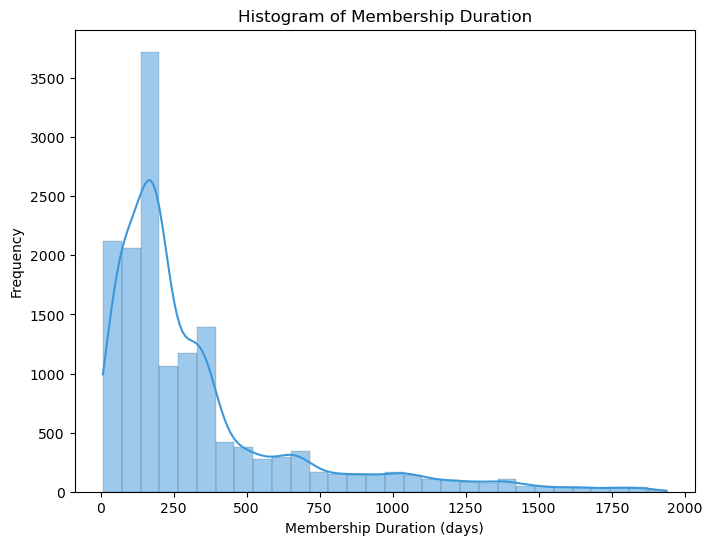

In [628]:
# color palettes
palette1 = ['#B26E39', '#FE9D52', '#FFCEA9', '#DDDDDD', '#DDDDDD', '#9ECBED', '#3C97DA', '#2A6A99']
palette2 = ['#772210', '#c13f24', '#cf614d', '#e17156', '#eda588', '#8fa2a3', '#1da9ce', '#1c5d94']

# Histogram of Membership Duration
plt.figure(figsize=(8, 6))
sns.histplot(df['MembershipDuration'], bins=30, kde=True, color=palette1[6], linewidth=0.1)
plt.title('Histogram of Membership Duration')
plt.xlabel('Membership Duration (days)')
plt.ylabel('Frequency')
plt.show()

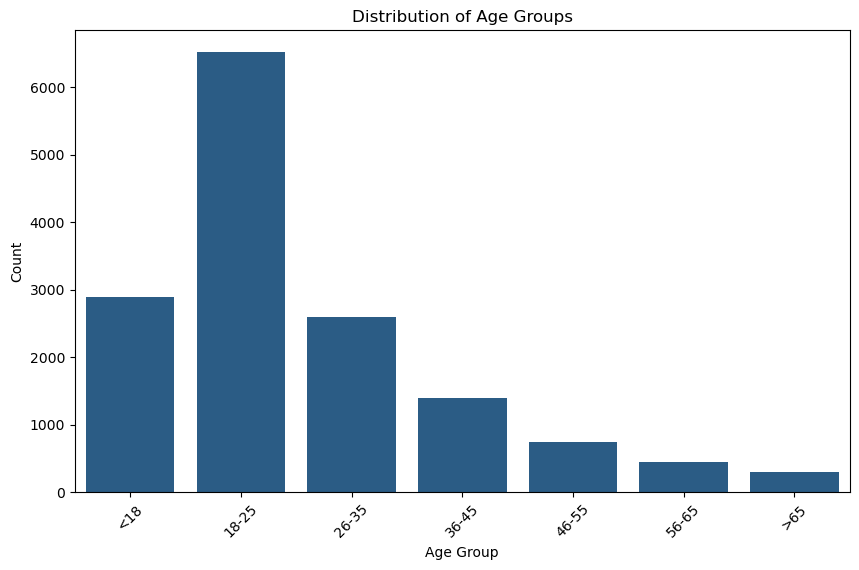

In [629]:
# Distribution of Age Group
plt.figure(figsize=(10, 6))

sns.countplot(x='AgeGroup', data=df, palette=['#1c5d94'])
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

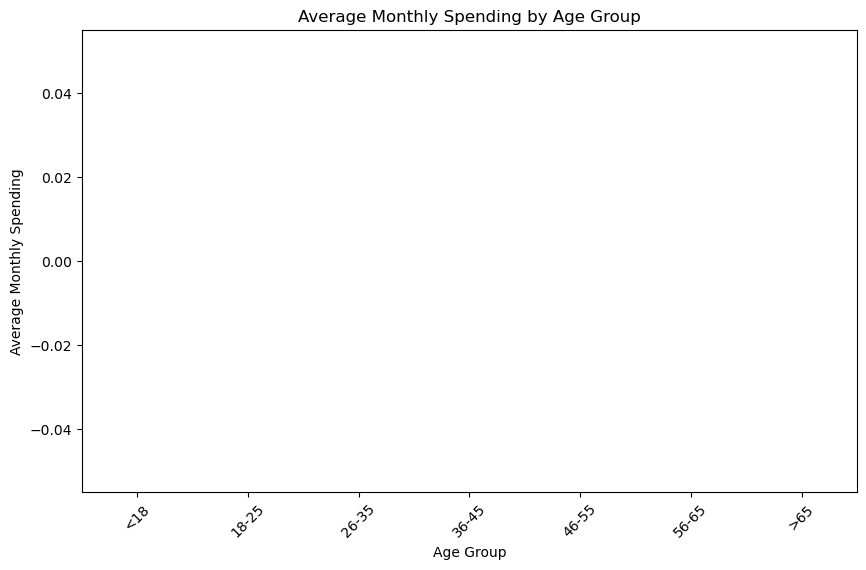

In [630]:
# Average Monthly Spending by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='AvgMonthlySpending', data=df, palette=['#3C97DA'])
plt.title('Average Monthly Spending by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Average Monthly Spending')
plt.show()

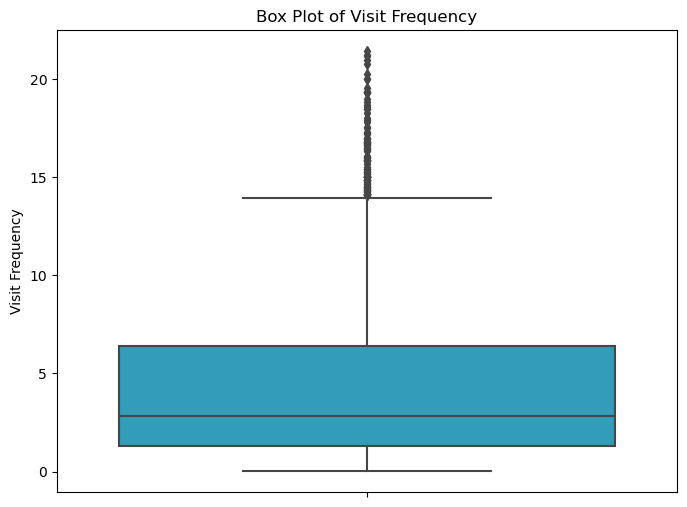

In [631]:
# Box Plot of Visit Frequency
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['VisitFrequency'], color=palette2[-2])
plt.title('Box Plot of Visit Frequency')
plt.ylabel('Visit Frequency')
plt.show()

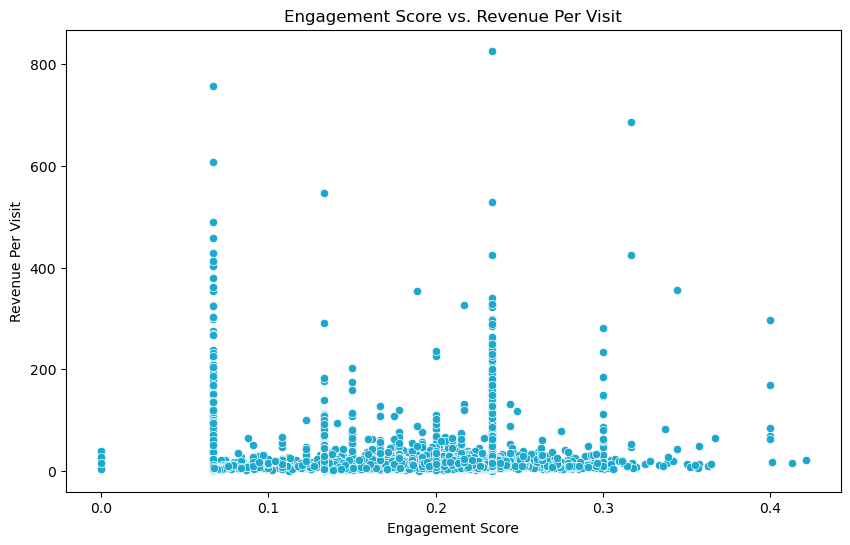

In [632]:
# Scatter Plot of Engagement Score vs. Revenue Per Visit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EngagementScore', y='RevenuePerVisit', data=df, color=palette2[-2])
plt.title('Engagement Score vs. Revenue Per Visit')
plt.xlabel('Engagement Score')
plt.ylabel('Revenue Per Visit')
plt.show()

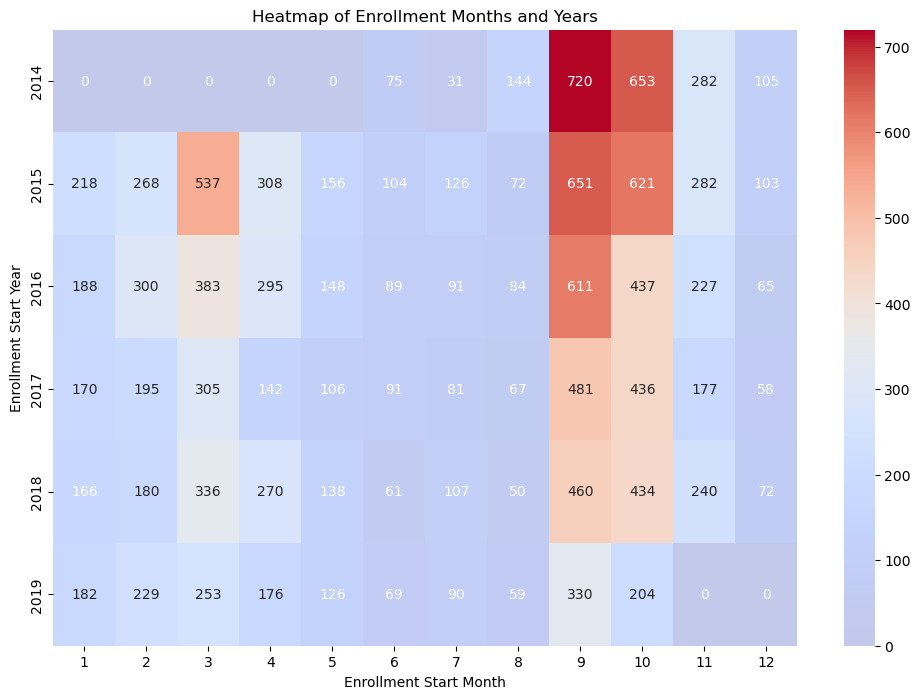

In [633]:
from matplotlib.colors import ListedColormap

enrollment_heatmap_data = df.groupby(['EnrollmentStartYear', 'EnrollmentStartMonth']).size().unstack(fill_value=0)

coolwarm = plt.cm.get_cmap('coolwarm', 256)  
newcolors = coolwarm(np.linspace(0, 1, 256))
alphas = np.linspace(0.3, 1, 256)  
newcolors[:, -1] = alphas
new_coolwarm = ListedColormap(newcolors)

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(enrollment_heatmap_data, cmap=new_coolwarm, annot=True, fmt='d')
plt.title('Heatmap of Enrollment Months and Years')
plt.xlabel('Enrollment Start Month')
plt.ylabel('Enrollment Start Year')
plt.show()

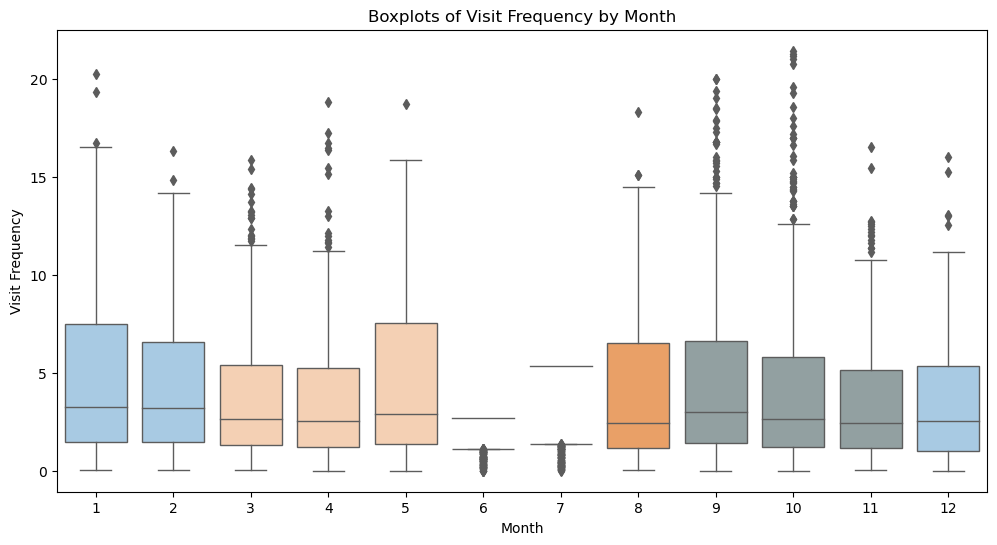

In [634]:
# Custom palette
palette3 = ['#9ECBED','#9ECBED','#FFCEA9','#FFCEA9','#FFCEA9','#FE9D52','#FE9D52','#FE9D52','#8fa2a3','#8fa2a3','#8fa2a3','#9ECBED']

# Boxplots of Visit Frequency by Month
plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(x='EnrollmentStartMonth', y='VisitFrequency', data=df, palette=palette3, linewidth=1)

# # Set edge color for each box
# for patch in boxplot.artists:
#     patch.set_edgecolor('black')

plt.title('Boxplots of Visit Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Visit Frequency')
plt.show()

In [635]:
months_duration = df['MembershipDuration'] / 30
df['AvgMonthlySpending'] = df['LifetimeValue'] / months_duration

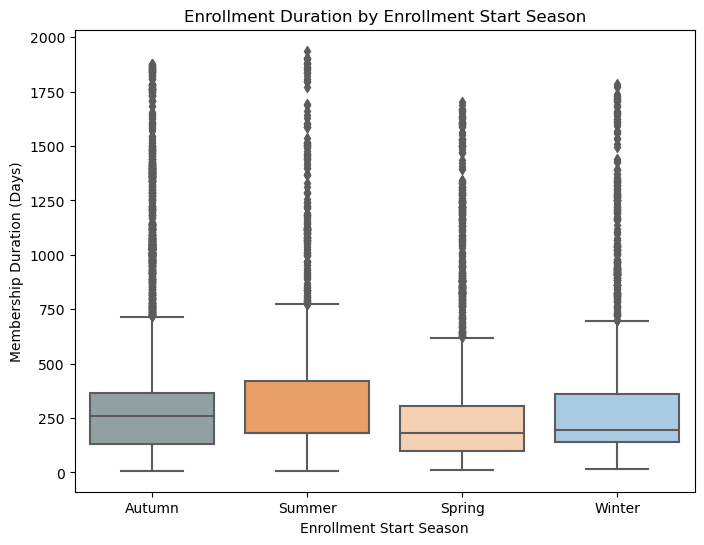

In [636]:
# Enrollment Duration by Season
seasons=['#8fa2a3', '#FE9D52', '#FFCEA9', '#9ECBED']

plt.figure(figsize=(8, 6))
sns.boxplot(x='StartSeason', y='MembershipDuration', data=df, palette = seasons)
plt.title('Enrollment Duration by Enrollment Start Season')
plt.xlabel('Enrollment Start Season')
plt.ylabel('Membership Duration (Days)')
plt.show()

# Clustering

In [637]:
!pip install umap-learn

### Utilitary functions

In [638]:
def plot(x, y, c, title):
    "A utilitary function to plot a simple scatter"
    plt.scatter(x, y, c=c, cmap="viridis", marker="o")
    plt.title("Clusters by " + title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.colorbar(label="Clusters")
    plt.show()

In [698]:
def complete_plot(df, title, r, c, x = 10, y = 10):
    "A utilitary function to plot a sequence of bar or histograms"
    fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(x, y))

    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        if i < len(axes):
            if df[column].dtype == 'float64' and len(df[column].unique()) > 10:
                axes[i].hist(df[column], bins=10, color='skyblue', edgecolor='black')
            else:
                axes[i].bar(df.index, df[column], color='grey')

            axes[i].tick_params(labelrotation=45)
            axes[i].tick_params(axis='y', rotation=90)

            axes[i].set_ylabel(column)
    
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()


In [640]:
import umap.umap_ as umap
import umap.plot
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

## Demographic perspective

In [641]:
demographic_features = ["Age", "Income", "NumberOfReferences", "LifetimeValue"]

In [642]:
df_clustered = df.copy()

In [643]:
df_clustered[demographic_features] = StandardScaler().fit_transform(df_clustered[demographic_features])

#### Dimensionality reduction

In [644]:
pca = PCA()
X_pca = pca.fit_transform(df_clustered[demographic_features])

#### Elbow method

In [645]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_pca)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

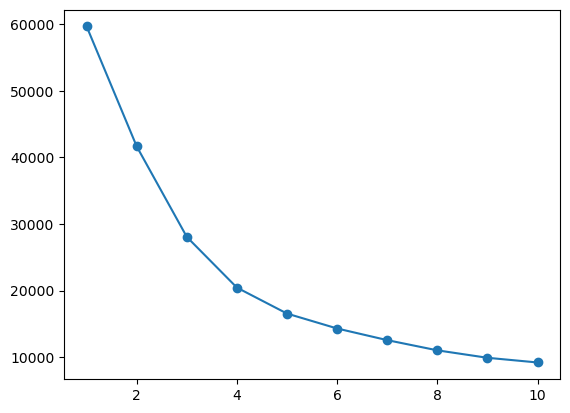

In [646]:
plt.plot(range(1,11), inertia, marker='o');

#### KMeans

In [647]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [648]:
df["Demographic/KMeans"] = kmeans.fit_predict(X_pca)

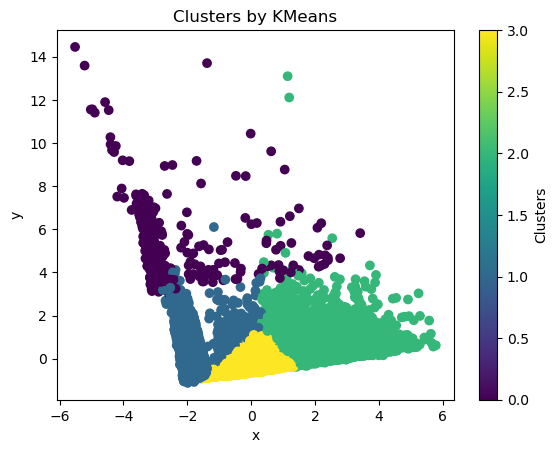

In [649]:
plot(X_pca[:, 0], X_pca[:, 1], df["Demographic/KMeans"], "KMeans")

## Results

In [650]:
silhouette_score(X_pca, df["Demographic/KMeans"])

0.4931765936842544

In [651]:
df.groupby("Demographic/KMeans")[demographic_features].mean()

,Age,Income,NumberOfReferences,LifetimeValue
Demographic/KMeans,,,,
0,16.712838,978.141892,1.125,858.772939
1,9.948097,242.948866,0.000,627.211719
2,49.267627,4722.820318,0.000,421.006418
3,24.217591,1998.567164,0.000,161.646880


#### DBSCAN

In [652]:
dbscan_model = DBSCAN(eps=0.5, n_jobs=-1)
df["Demographic/DBSCAN"] = dbscan_model.fit_predict(X_pca)

In [653]:
silhouette_score(X_pca, df["Demographic/DBSCAN"])

0.6768418262880953

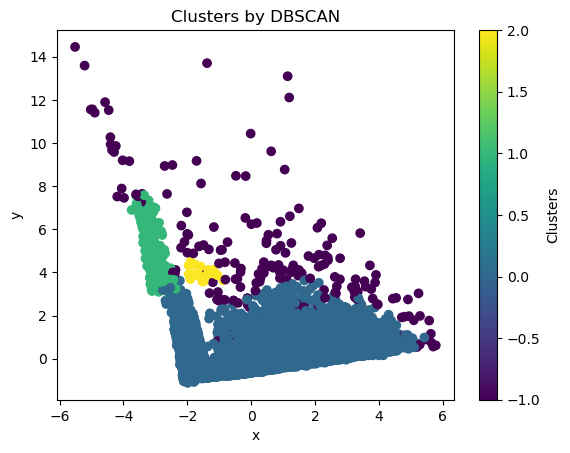

In [654]:
plot(X_pca[:, 0], X_pca[:, 1], df["Demographic/DBSCAN"], "DBSCAN")

In [655]:
df.groupby("Demographic/DBSCAN")[demographic_features].mean()

,Age,Income,NumberOfReferences,LifetimeValue
Demographic/DBSCAN,,,,
-1,44.278351,3739.536082,0.664948,1186.705309
0,26.002549,2160.996074,0.000000,282.332548
1,8.331551,0.000000,1.000000,947.533957
2,19.058824,1773.529412,1.000000,376.814706


In [656]:
demographic_encoding = {'Demographic/DBSCAN': {-1: "Seniors", 0: "Adults", 1: "Kids", 2: "Youngs" }}
df.replace(demographic_encoding, inplace=True)

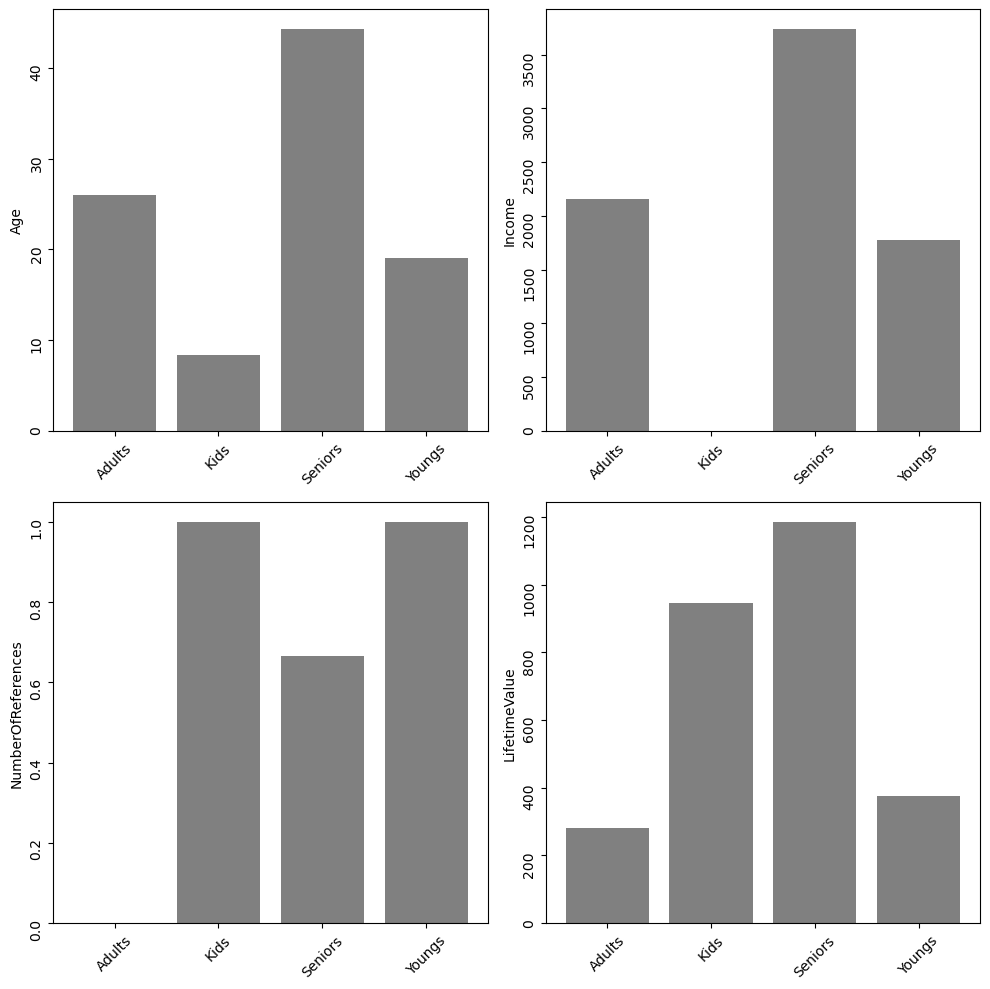

In [699]:
complete_plot(df.groupby("Demographic/DBSCAN")[demographic_features].mean(), "Demographics perspective", 2, 2)

## Value perspective

In [658]:
value_features = ["LastActivityRecency", "LifetimeValue", "AvgMonthlySpending",
                  "UtilizationRatio", "MembershipDuration", "DaysWithoutFrequency", 
                  "ClassAttendanceRatio", "EngagementScore"]

In [659]:
df_clustered = df.copy()

In [660]:
# df_clustered[value_features] = df_clustered[value_features].apply(lambda x: np.log(x + 1))

In [661]:
df_clustered.loc[df_clustered["EngagementScore"].isna(), "EngagementScore"] = 0

In [662]:
df_clustered[value_features] = StandardScaler().fit_transform(df_clustered[value_features])

#### UMAP

In [663]:
reducer = umap.UMAP(n_neighbors=100, min_dist=0.1, n_components=2, random_state=42, n_jobs=-1, metric="euclidean")
embedding = reducer.fit_transform(df_clustered[value_features])
embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])

#### KMeans

In [664]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(embedding_df)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

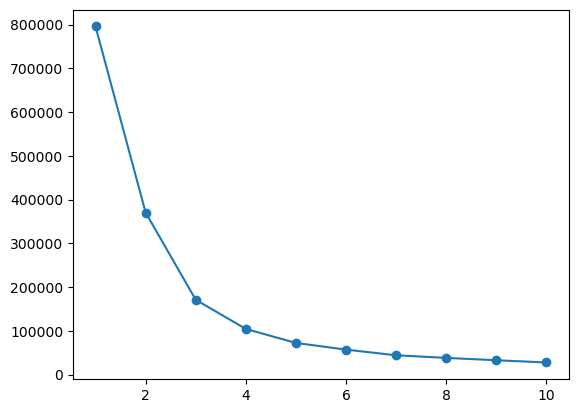

In [665]:
plt.plot(range(1,11), inertia, marker='o');

In [666]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [667]:
df["Value/KMeans"] = kmeans.fit_predict(embedding_df)

In [668]:
silhouette_score(embedding_df, df["Value/KMeans"])

0.58833724

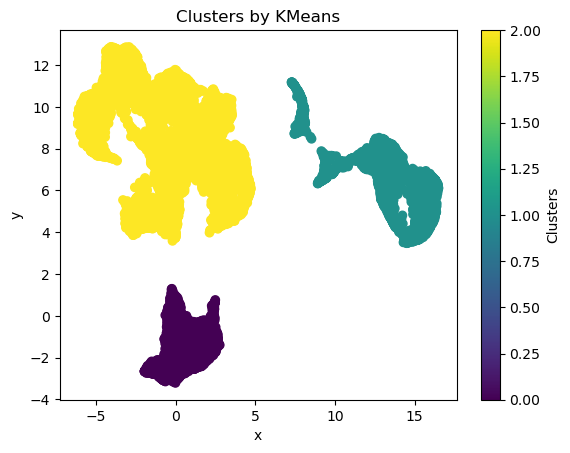

In [669]:
plot(embedding_df["UMAP1"], embedding_df["UMAP2"], df["Value/KMeans"], "KMeans")

#### Results 

In [670]:
df.groupby("Value/KMeans")[value_features].mean()

,LastActivityRecency,LifetimeValue,AvgMonthlySpending,UtilizationRatio,MembershipDuration,DaysWithoutFrequency,ClassAttendanceRatio,EngagementScore
Value/KMeans,,,,,,,,
0,837.833633,385.320453,32.083333,0.167612,421.632770,79.774704,0.868752,0.218382
1,380.408690,552.052813,83.180825,0.238690,281.035609,151.899053,0.335524,0.082839
2,826.993826,192.950794,24.948718,0.126059,314.893066,57.836843,0.005692,0.077890


In [671]:
value_encoding = {'Value/KMeans': {0: "Olders", 1: "Golden", 2: "Common" }}
df.replace(value_encoding, inplace=True)

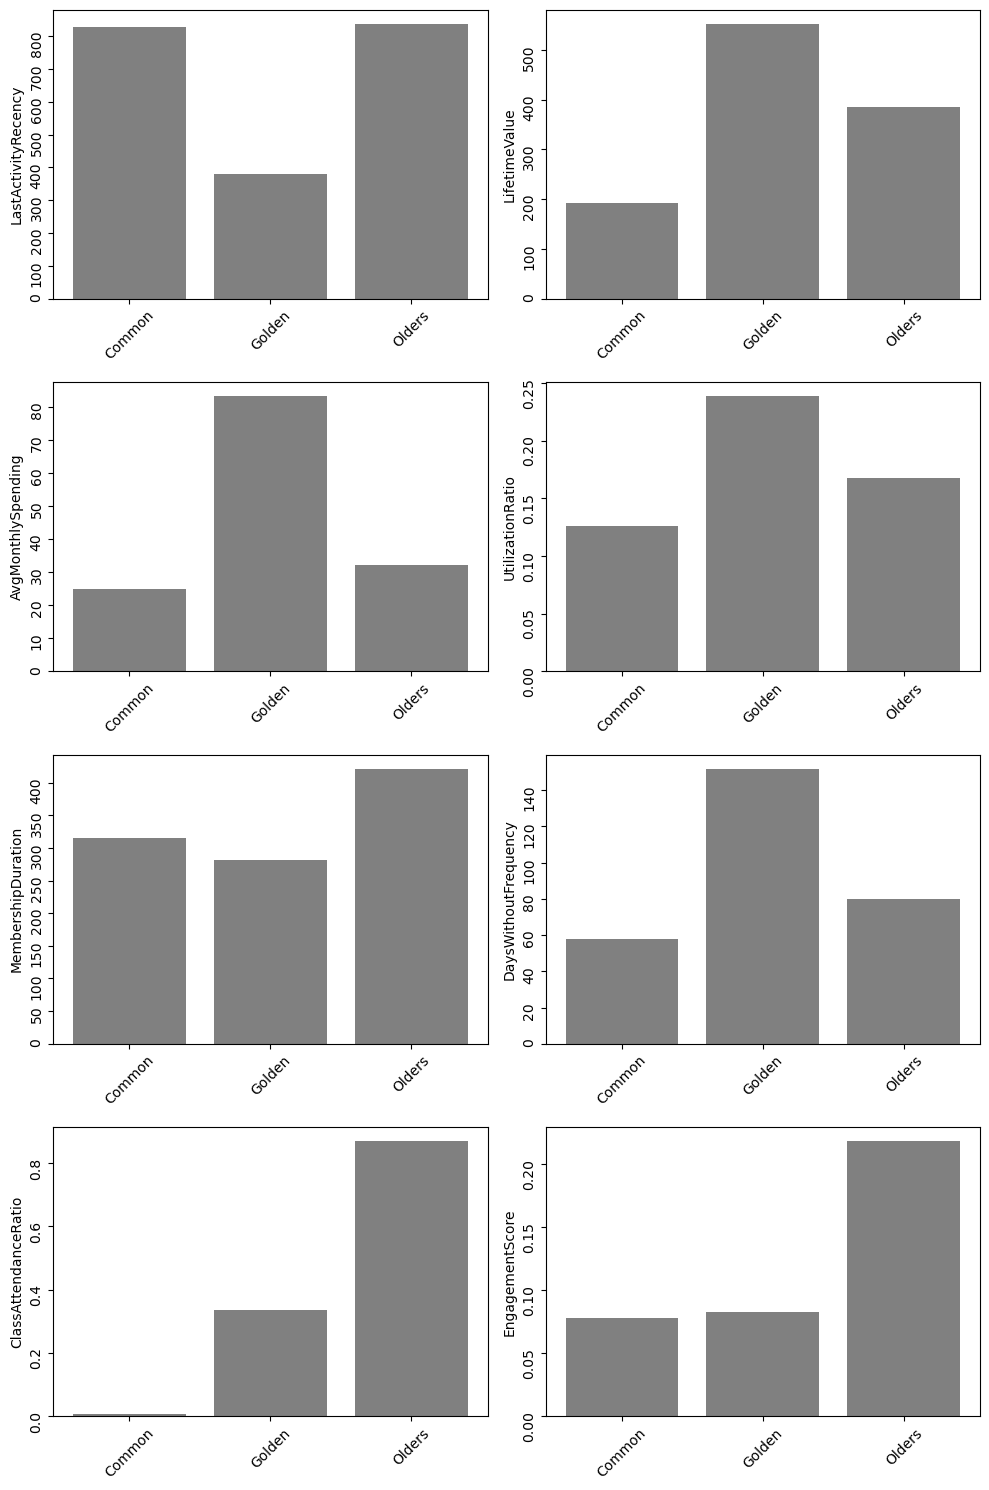

In [701]:
complete_plot(df.groupby("Value/KMeans")[value_features].mean(), "Value perspective", 4, 2, 10, 15)

#### DBSCAN 

In [673]:
dbscan_model = DBSCAN(eps=0.9, n_jobs=-1)
df["Value/DBSCAN"] = dbscan_model.fit_predict(embedding_df)

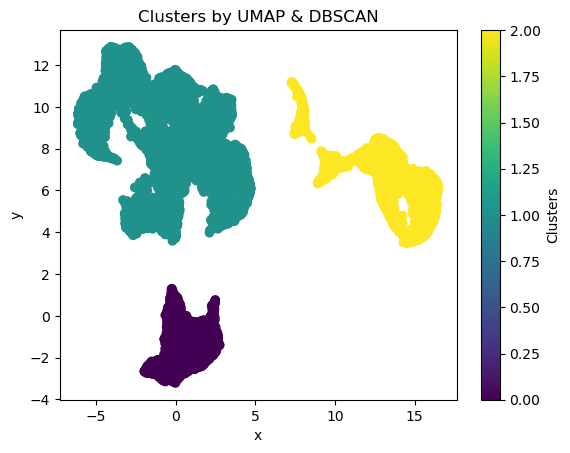

In [674]:
plot(embedding_df["UMAP1"], embedding_df["UMAP2"], df["Value/DBSCAN"], "UMAP & DBSCAN")

#### Results

In [675]:
silhouette_score(embedding_df, df["Value/DBSCAN"])

0.58833724

In [676]:
df.groupby("Value/DBSCAN")[value_features].mean()

,LastActivityRecency,LifetimeValue,AvgMonthlySpending,UtilizationRatio,MembershipDuration,DaysWithoutFrequency,ClassAttendanceRatio,EngagementScore
Value/DBSCAN,,,,,,,,
0,837.833633,385.320453,32.083333,0.167612,421.632770,79.774704,0.868752,0.218382
1,826.993826,192.950794,24.948718,0.126059,314.893066,57.836843,0.005692,0.077890
2,380.408690,552.052813,83.180825,0.238690,281.035609,151.899053,0.335524,0.082839


#### GMM

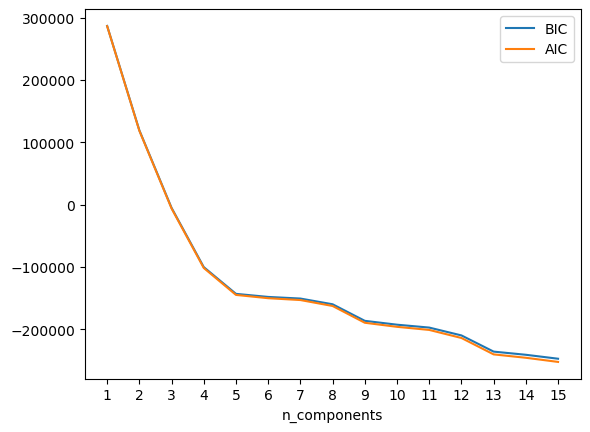

In [677]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_clustered[value_features])
          for n in n_components]

bic_values = [m.bic(df_clustered[value_features]) for m in models]
aic_values = [m.aic(df_clustered[value_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [678]:
gmm = GaussianMixture(n_components=3, random_state=42)
df["Value/GMM"] = gmm.fit_predict(embedding_df)

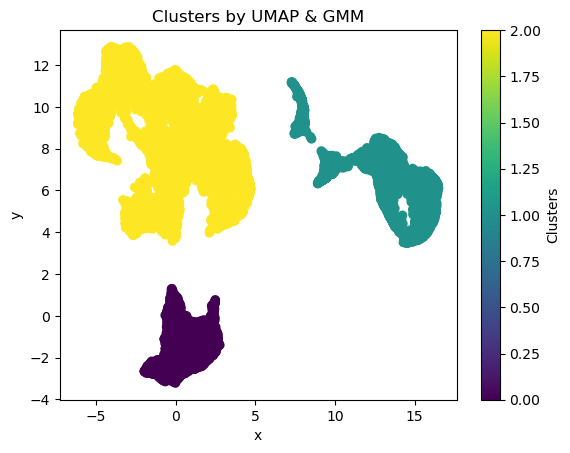

In [679]:
plot(embedding_df["UMAP1"], embedding_df["UMAP2"], df["Value/GMM"], "UMAP & GMM")

In [680]:
silhouette_score(embedding_df, df["Value/GMM"])

0.58833724

In [681]:
calinski_harabasz_score(embedding_df, df["Value/GMM"])

27233.607390054894

In [682]:
davies_bouldin_score(embedding_df, df["Value/GMM"])

0.5029788355588313

In [683]:
df.groupby("Value/GMM")[value_features].mean()

,LastActivityRecency,LifetimeValue,AvgMonthlySpending,UtilizationRatio,MembershipDuration,DaysWithoutFrequency,ClassAttendanceRatio,EngagementScore
Value/GMM,,,,,,,,
0,837.833633,385.320453,32.083333,0.167612,421.632770,79.774704,0.868752,0.218382
1,380.408690,552.052813,83.180825,0.238690,281.035609,151.899053,0.335524,0.082839
2,826.993826,192.950794,24.948718,0.126059,314.893066,57.836843,0.005692,0.077890


## Sports perspective

In [684]:
sports_features = ["AthleticsActivities", "WaterActivities", "FitnessActivities",
                   "RacketActivities", "CombatActivities"]

#### UMAP

In [685]:
reducer = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42, n_jobs=-1)
embedding = reducer.fit_transform(df_clustered[sports_features])
embedding_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])

#### KMeans 

In [686]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(embedding_df)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

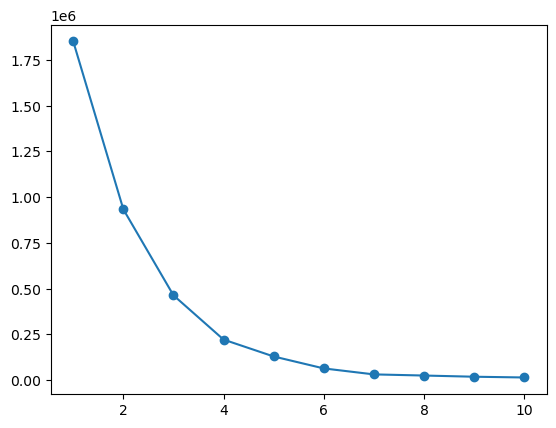

In [687]:
plt.plot(range(1,11), inertia, marker='o');

In [688]:
kmeans = KMeans(n_clusters=6, random_state=42)

In [689]:
df["Sports/KMeans"] = kmeans.fit_predict(embedding_df)

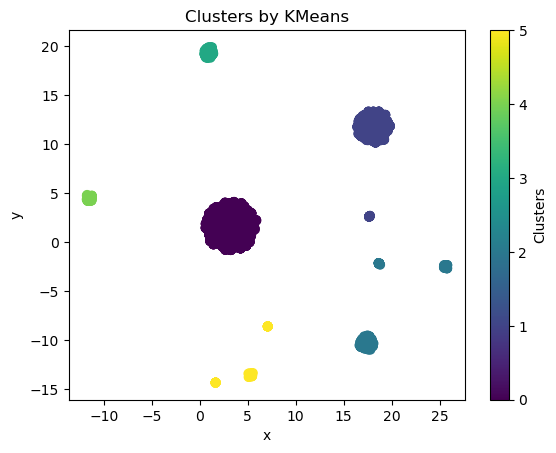

In [690]:
plot(embedding_df["UMAP1"], embedding_df["UMAP2"], df["Sports/KMeans"], "KMeans")

#### Results

In [691]:
silhouette_score(embedding_df, df["Sports/KMeans"])

0.867898

In [692]:
df.groupby("Sports/KMeans")[sports_features].mean()

,AthleticsActivities,WaterActivities,FitnessActivities,RacketActivities,CombatActivities
Sports/KMeans,,,,,
0,0.001802,0.000000,1.0,0.000000,0.000000
1,0.022924,0.980897,0.0,0.003566,0.000000
2,0.000645,0.062540,0.0,0.192134,0.812379
3,0.000000,0.000000,0.0,0.000000,0.000000
4,0.002331,1.000000,1.0,0.009324,0.000000
5,0.010695,0.082888,1.0,0.088235,0.925134


In [693]:
sports_encoding = {'Sports/KMeans': {0: "Fitness", 1: "Athletic and Water", 2: "Racket and Combat", 3: "Ghosts", 4: "Water and Fitness", 5: "Explorers" }}
df.replace(sports_encoding, inplace=True)

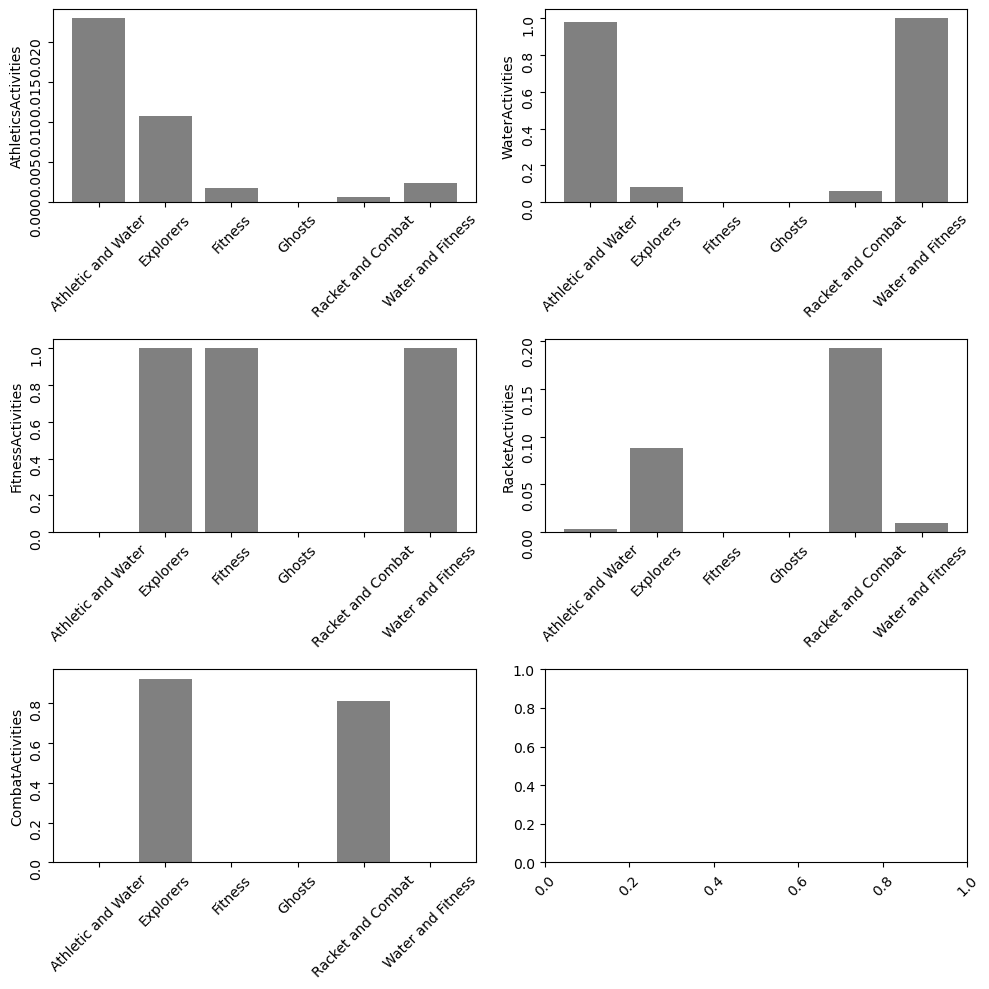

In [703]:
complete_plot(df.groupby("Sports/KMeans")[sports_features].mean(), "Sports perspective", 3, 2)

#### DBSCAN

In [704]:
dbscan_model = DBSCAN(eps=0.5, n_jobs=-1)
df["Sports/DBSCAN"] = dbscan_model.fit_predict(embedding_df)

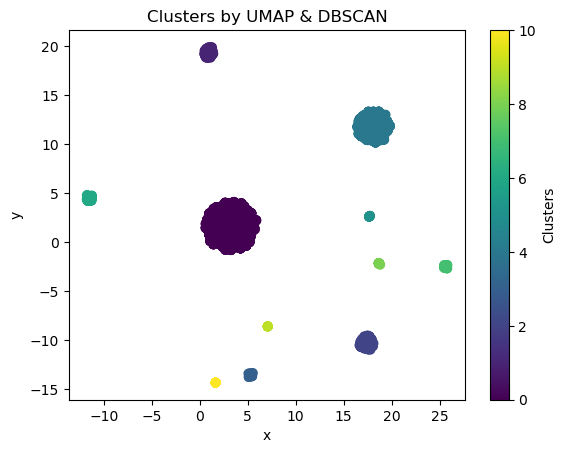

In [705]:
plot(embedding_df["UMAP1"], embedding_df["UMAP2"], df["Sports/DBSCAN"], "UMAP & DBSCAN")

#### Results

In [706]:
silhouette_score(embedding_df, df["Sports/DBSCAN"])

0.86421597

In [707]:
df.groupby("Sports/DBSCAN")[sports_features].mean()

,AthleticsActivities,WaterActivities,FitnessActivities,RacketActivities,CombatActivities
Sports/DBSCAN,,,,,
0,0.001802,0.0,1.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.000000,0.000000
2,0.000861,0.0,0.0,0.004303,1.000000
3,0.012698,0.0,1.0,0.009524,1.000000
4,0.003895,1.0,0.0,0.003635,0.000000
5,1.000000,0.0,0.0,0.000000,0.000000
6,0.002331,1.0,1.0,0.009324,0.000000
7,0.000000,0.0,0.0,1.000000,0.003425
8,0.000000,1.0,0.0,0.010309,1.000000


# Contigency matrix

In [708]:
pd.crosstab([df['Demographic/DBSCAN'], df['Value/KMeans']], df['Sports/KMeans'])

Sports/KMeans                    Athletic and Water  Explorers  Fitness  \
Demographic/DBSCAN Value/KMeans                                           
Adults             Common                      1172        254     6233   
                   Golden                      1051         99     1204   
                   Olders                      1484         18      249   
Kids               Common                         2          0        4   
                   Golden                        51          0        0   
                   Olders                       101          0        0   
Seniors            Common                        10          2       32   
                   Golden                        24          1       33   
                   Olders                        28          0        8   
Youngs             Common                         0          0        4   
                   Golden                         0          0        2   
                   Olders                         3          0        0   

Sports/KMeans                    Ghosts  Racket and Combat  Water and Fitness  
Demographic/DBSCAN Value/KMeans                                                
Adults             Common           160                930                249  
                   Golden           226                251                 85  
                   Olders           456                331                 65  
Kids               Common             0                  3                  0  
                   Golden             0                  6                  0  
                   Olders             2                 17                  1  
Seniors            Common             0                  4                  7  
                   Golden            11                  3                 14  
                   Olders             9                  2                  6  
Youngs             Common             0                  3                  2  
                   Golden             0                  0                  0  
                   Olders             2                  1                  0